In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
file_path = "Loan 2.csv"
data = pd.read_csv(file_path)

In [12]:
data

Customer ID               Name Gender  Age  Income (USD)  \
0         C-36995   Frederica Shealy      F   56       1933.05   
1         C-33999  America Calderone      M   32       4952.91   
2          C-3770      Rosetta Verne      F   65        988.19   
3         C-26480         Zoe Chitty      F   65           NaN   
4         C-23459       Afton Venema      F   31       2614.77   
...           ...                ...    ...  ...           ...   
29995     C-43723  Angelyn Clevenger      M   38       4969.41   
29996     C-32511       Silas Slaugh      M   20       1606.88   
29997      C-5192       Carmelo Lone      F   49           NaN   
29998     C-12172      Carolann Osby      M   38       2417.71   
29999     C-33003  Bridget Garibaldi      F   63       3068.24   

      Income Stability            Profession     Type of Employment  \
0                  Low               Working            Sales staff   
1                  Low               Working                    NaN   
2                 High             Pensioner                    NaN   
3                 High             Pensioner                    NaN   
4                  Low               Working  High skill tech staff   
...                ...                   ...                    ...   
29995              Low  Commercial associate               Managers   
29996              Low               Working               Laborers   
29997              Low               Working            Sales staff   
29998              Low               Working         Security staff   
29999             High             Pensioner                    NaN   

         Location  Loan Amount Request (USD)  ...  Credit Score  \
0      Semi-Urban                   72809.58  ...        809.44   
1      Semi-Urban                   46837.47  ...        780.40   
2      Semi-Urban                   45593.04  ...        833.15   
3           Rural                   80057.92  ...        832.70   
4      Semi-Urban                  113858.89  ...        745.55   
...           ...                        ...  ...           ...   
29995       Urban                   76657.90  ...        869.61   
29996  Semi-Urban                   66595.14  ...        729.41   
29997       Urban                   81410.08  ...           NaN   
29998  Semi-Urban                  142524.10  ...        677.27   
29999       Rural                  156290.54  ...        815.44   

      No. of Defaults Has Active Credit Card  Property ID  Property Age  \
0                   0                    NaN          746       1933.05   
1                   0            Unpossessed          608       4952.91   
2                   0            Unpossessed          546        988.19   
3                   1            Unpossessed          890           NaN   
4                   1                 Active          715       2614.77   
...               ...                    ...          ...           ...   
29995               0            Unpossessed          566       4969.41   
29996               0               Inactive          175       1606.88   
29997               0                 Active          959           NaN   
29998               1            Unpossessed          375       2417.71   
29999               0                 Active          344       3068.24   

       Property Type Property Location  Co-Applicant  Property Price  \
0                  4             Rural             1       119933.46   
1                  2             Rural             1        54791.00   
2                  2             Urban             0        72440.58   
3                  2        Semi-Urban             1       121441.51   
4                  4        Semi-Urban             1       208567.91   
...              ...               ...           ...             ...   
29995              4             Urban             1       111096.56   
29996              3             Urban             1        73453.94   
29997 

## Studying The Data

1. Understand the structure of the data

In [13]:
print("Data Structure:")
print(data.info())

print("\nFirst few rows of the dataset:")
print(data.head())

print("\nSummary statistics:")
print(data.describe())

Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  

2. Identify missing values

In [14]:
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64


3. Basic data exploration

###### Distribution of numerical features

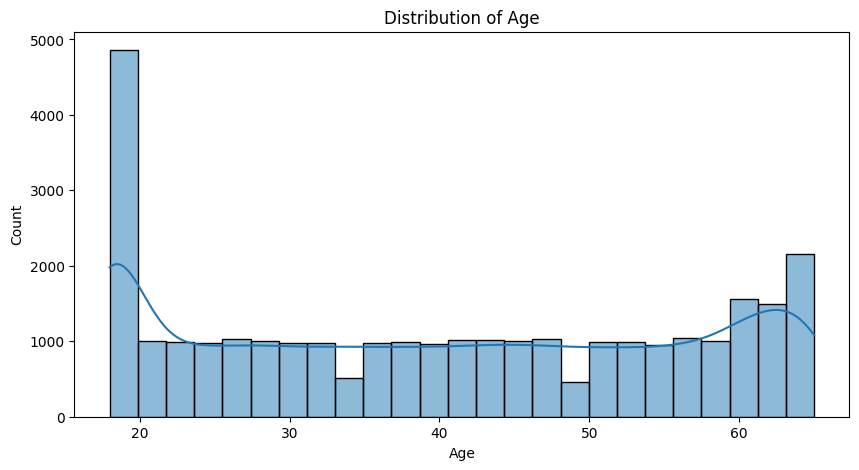

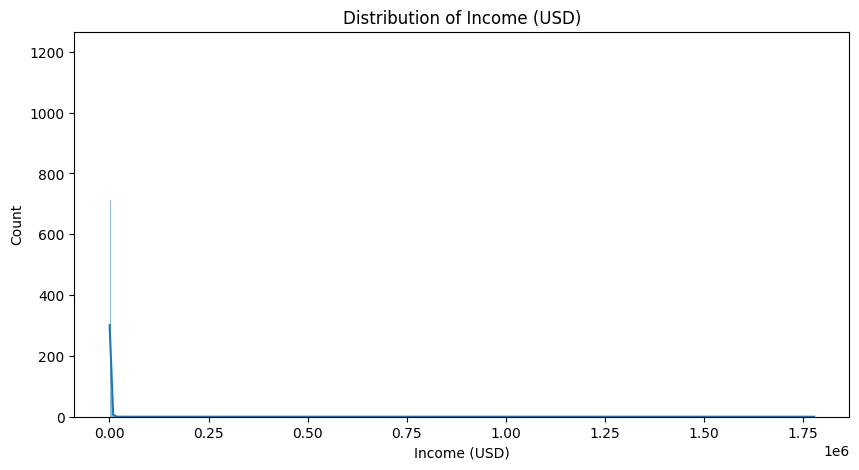

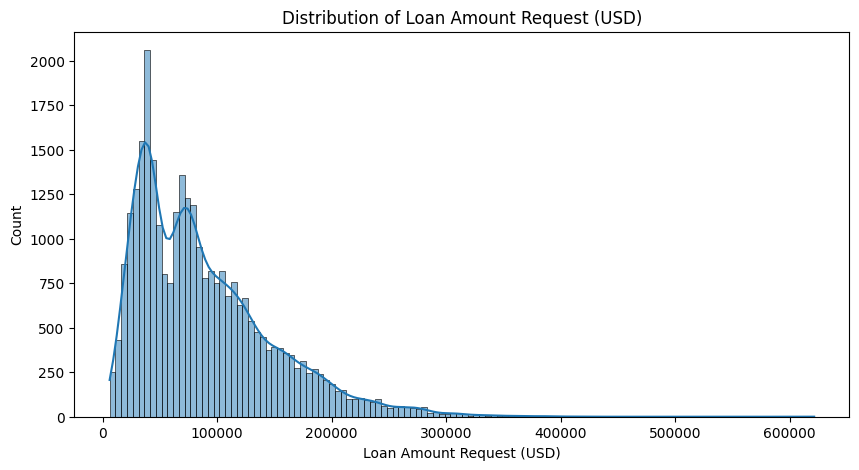

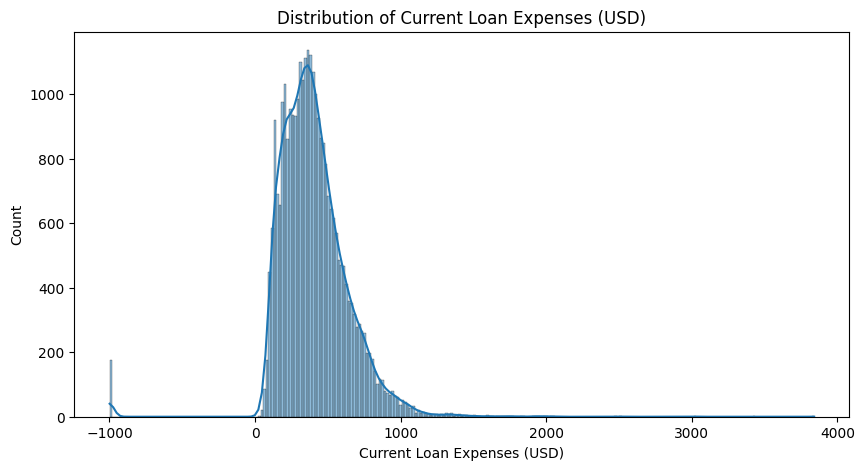

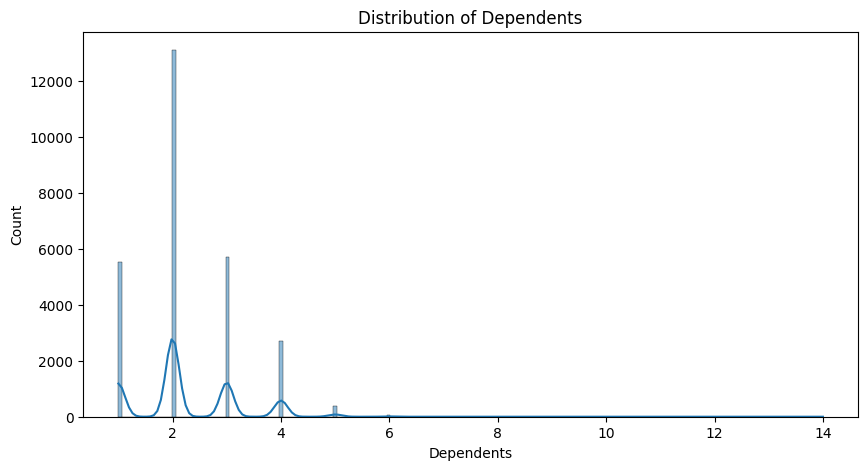

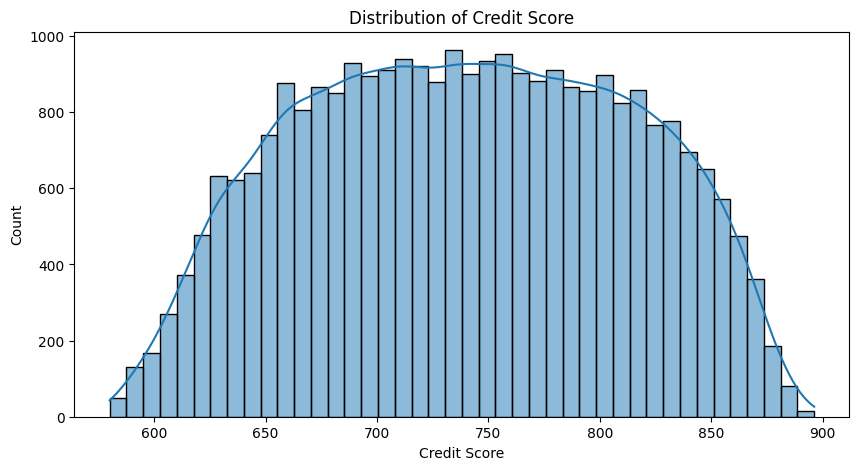

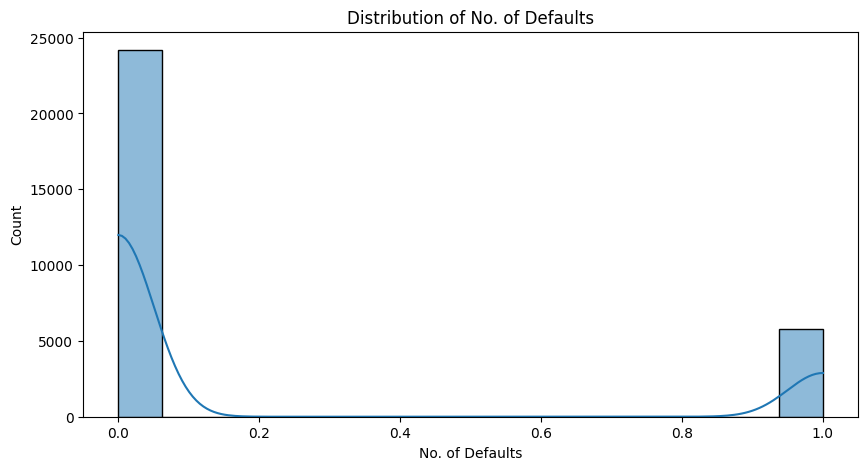

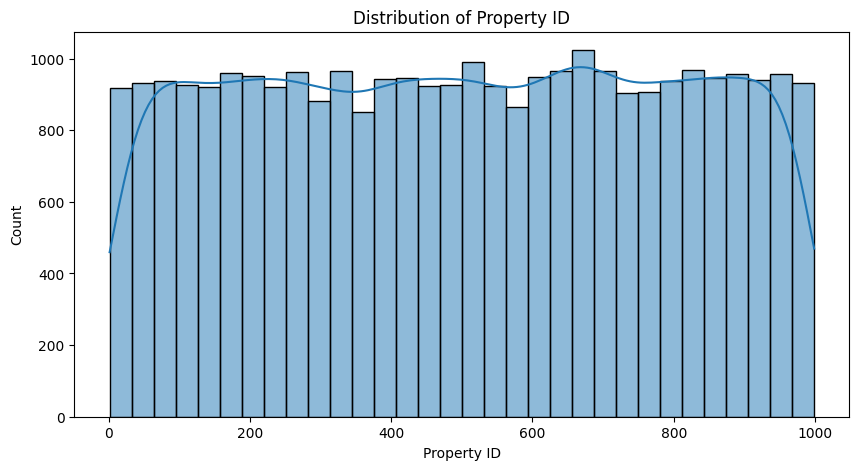

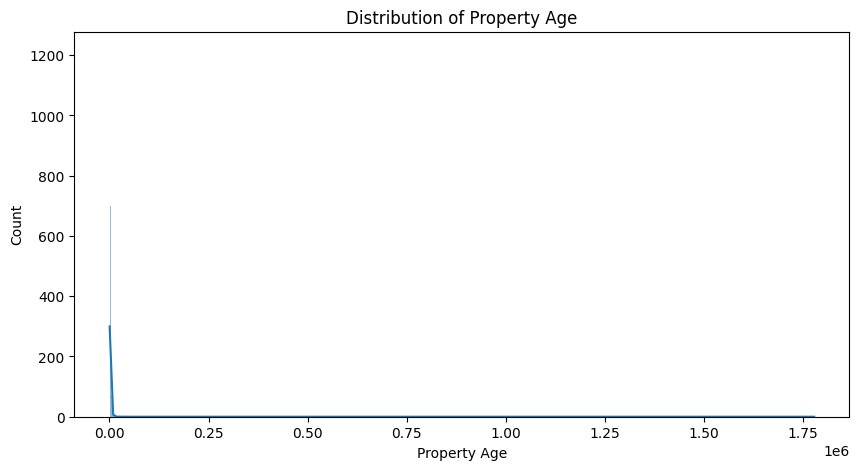

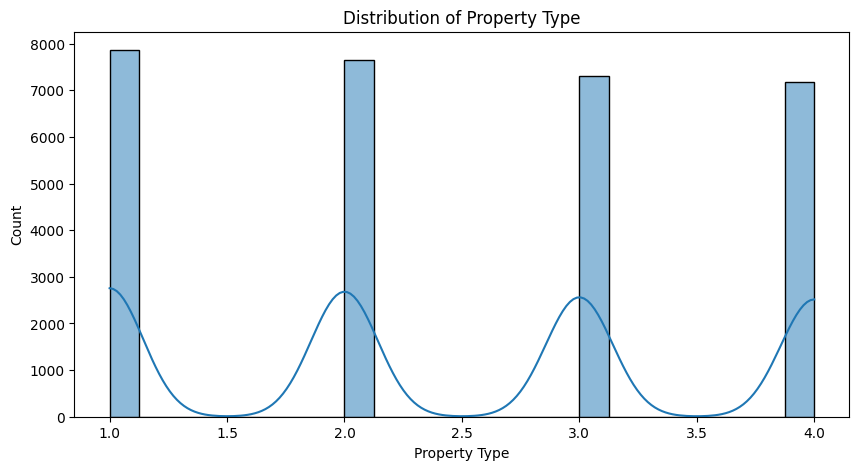

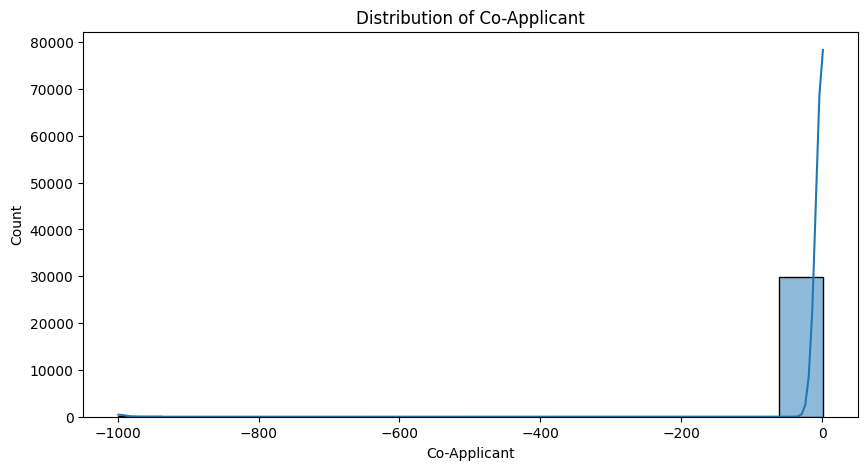

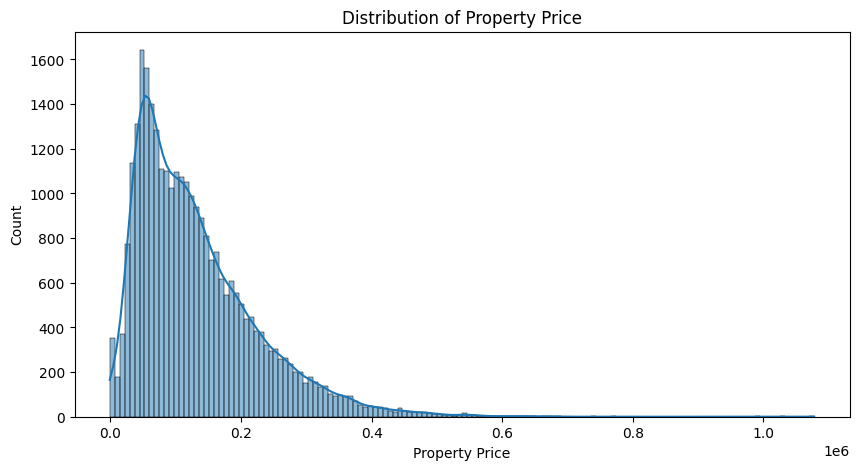

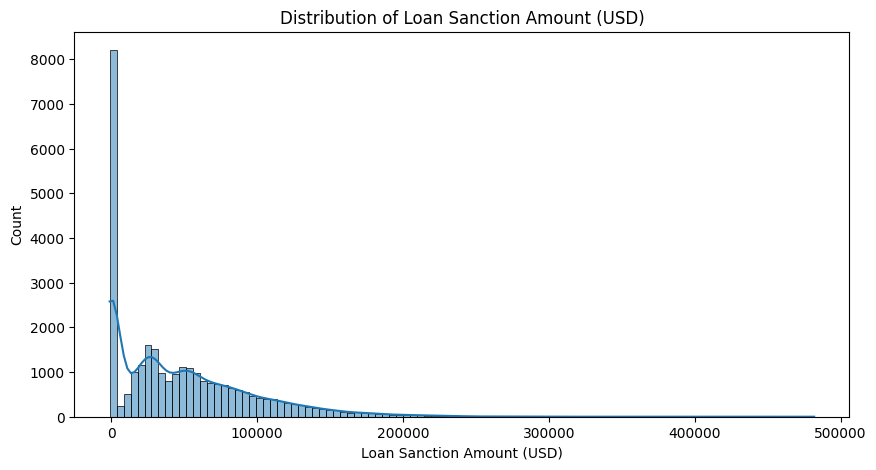

In [15]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()



###### Correlation Heatmap


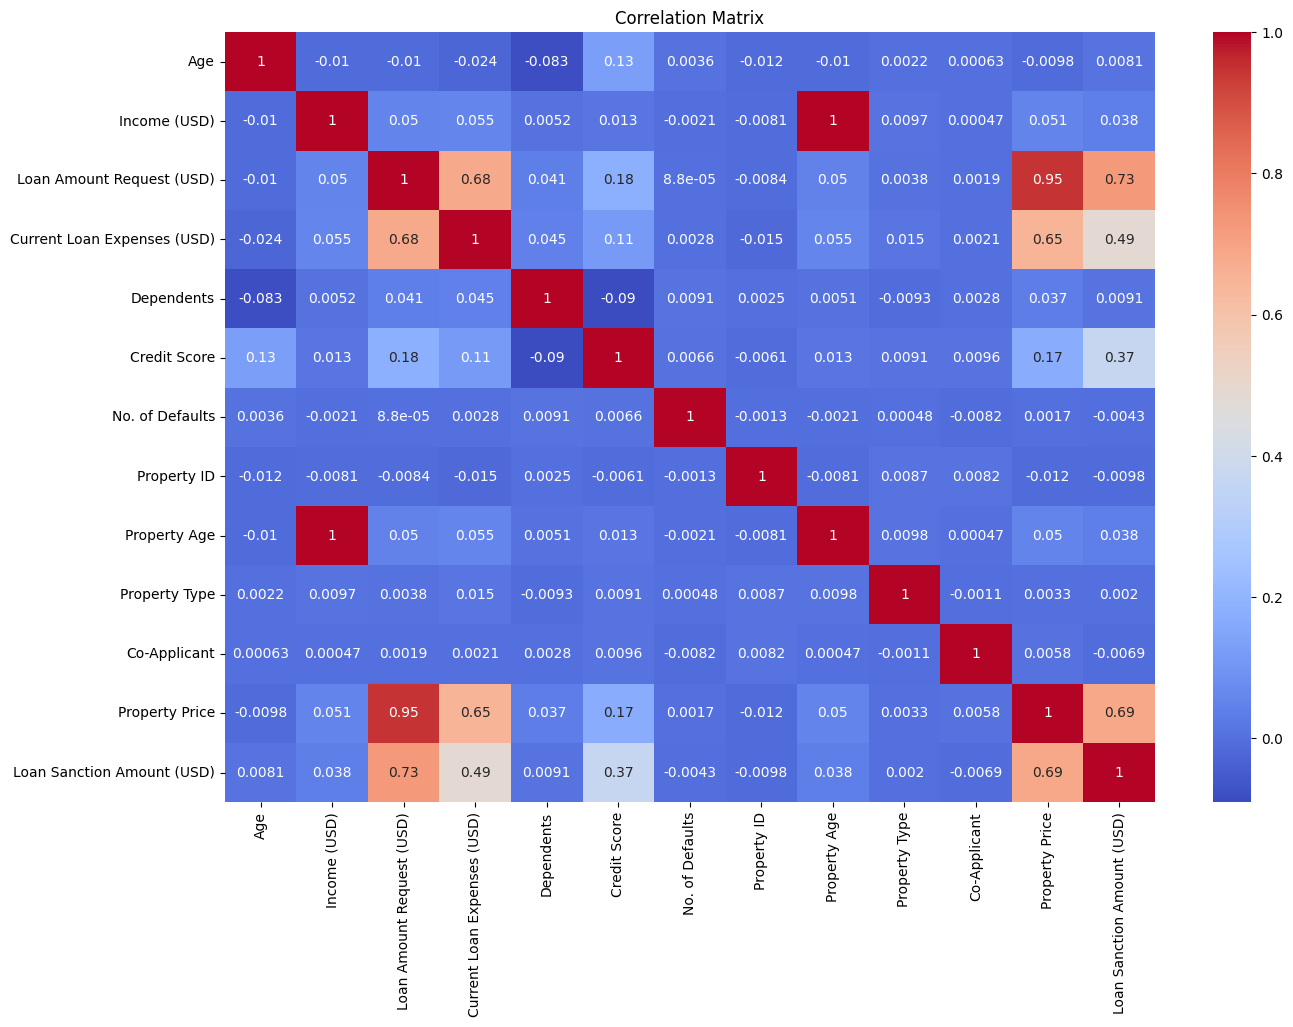

In [16]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
# Use only numerical columns for correlation matrix
numerical_data = data[numerical_cols]
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

###### Pairplot to understand relationships between numerical variables


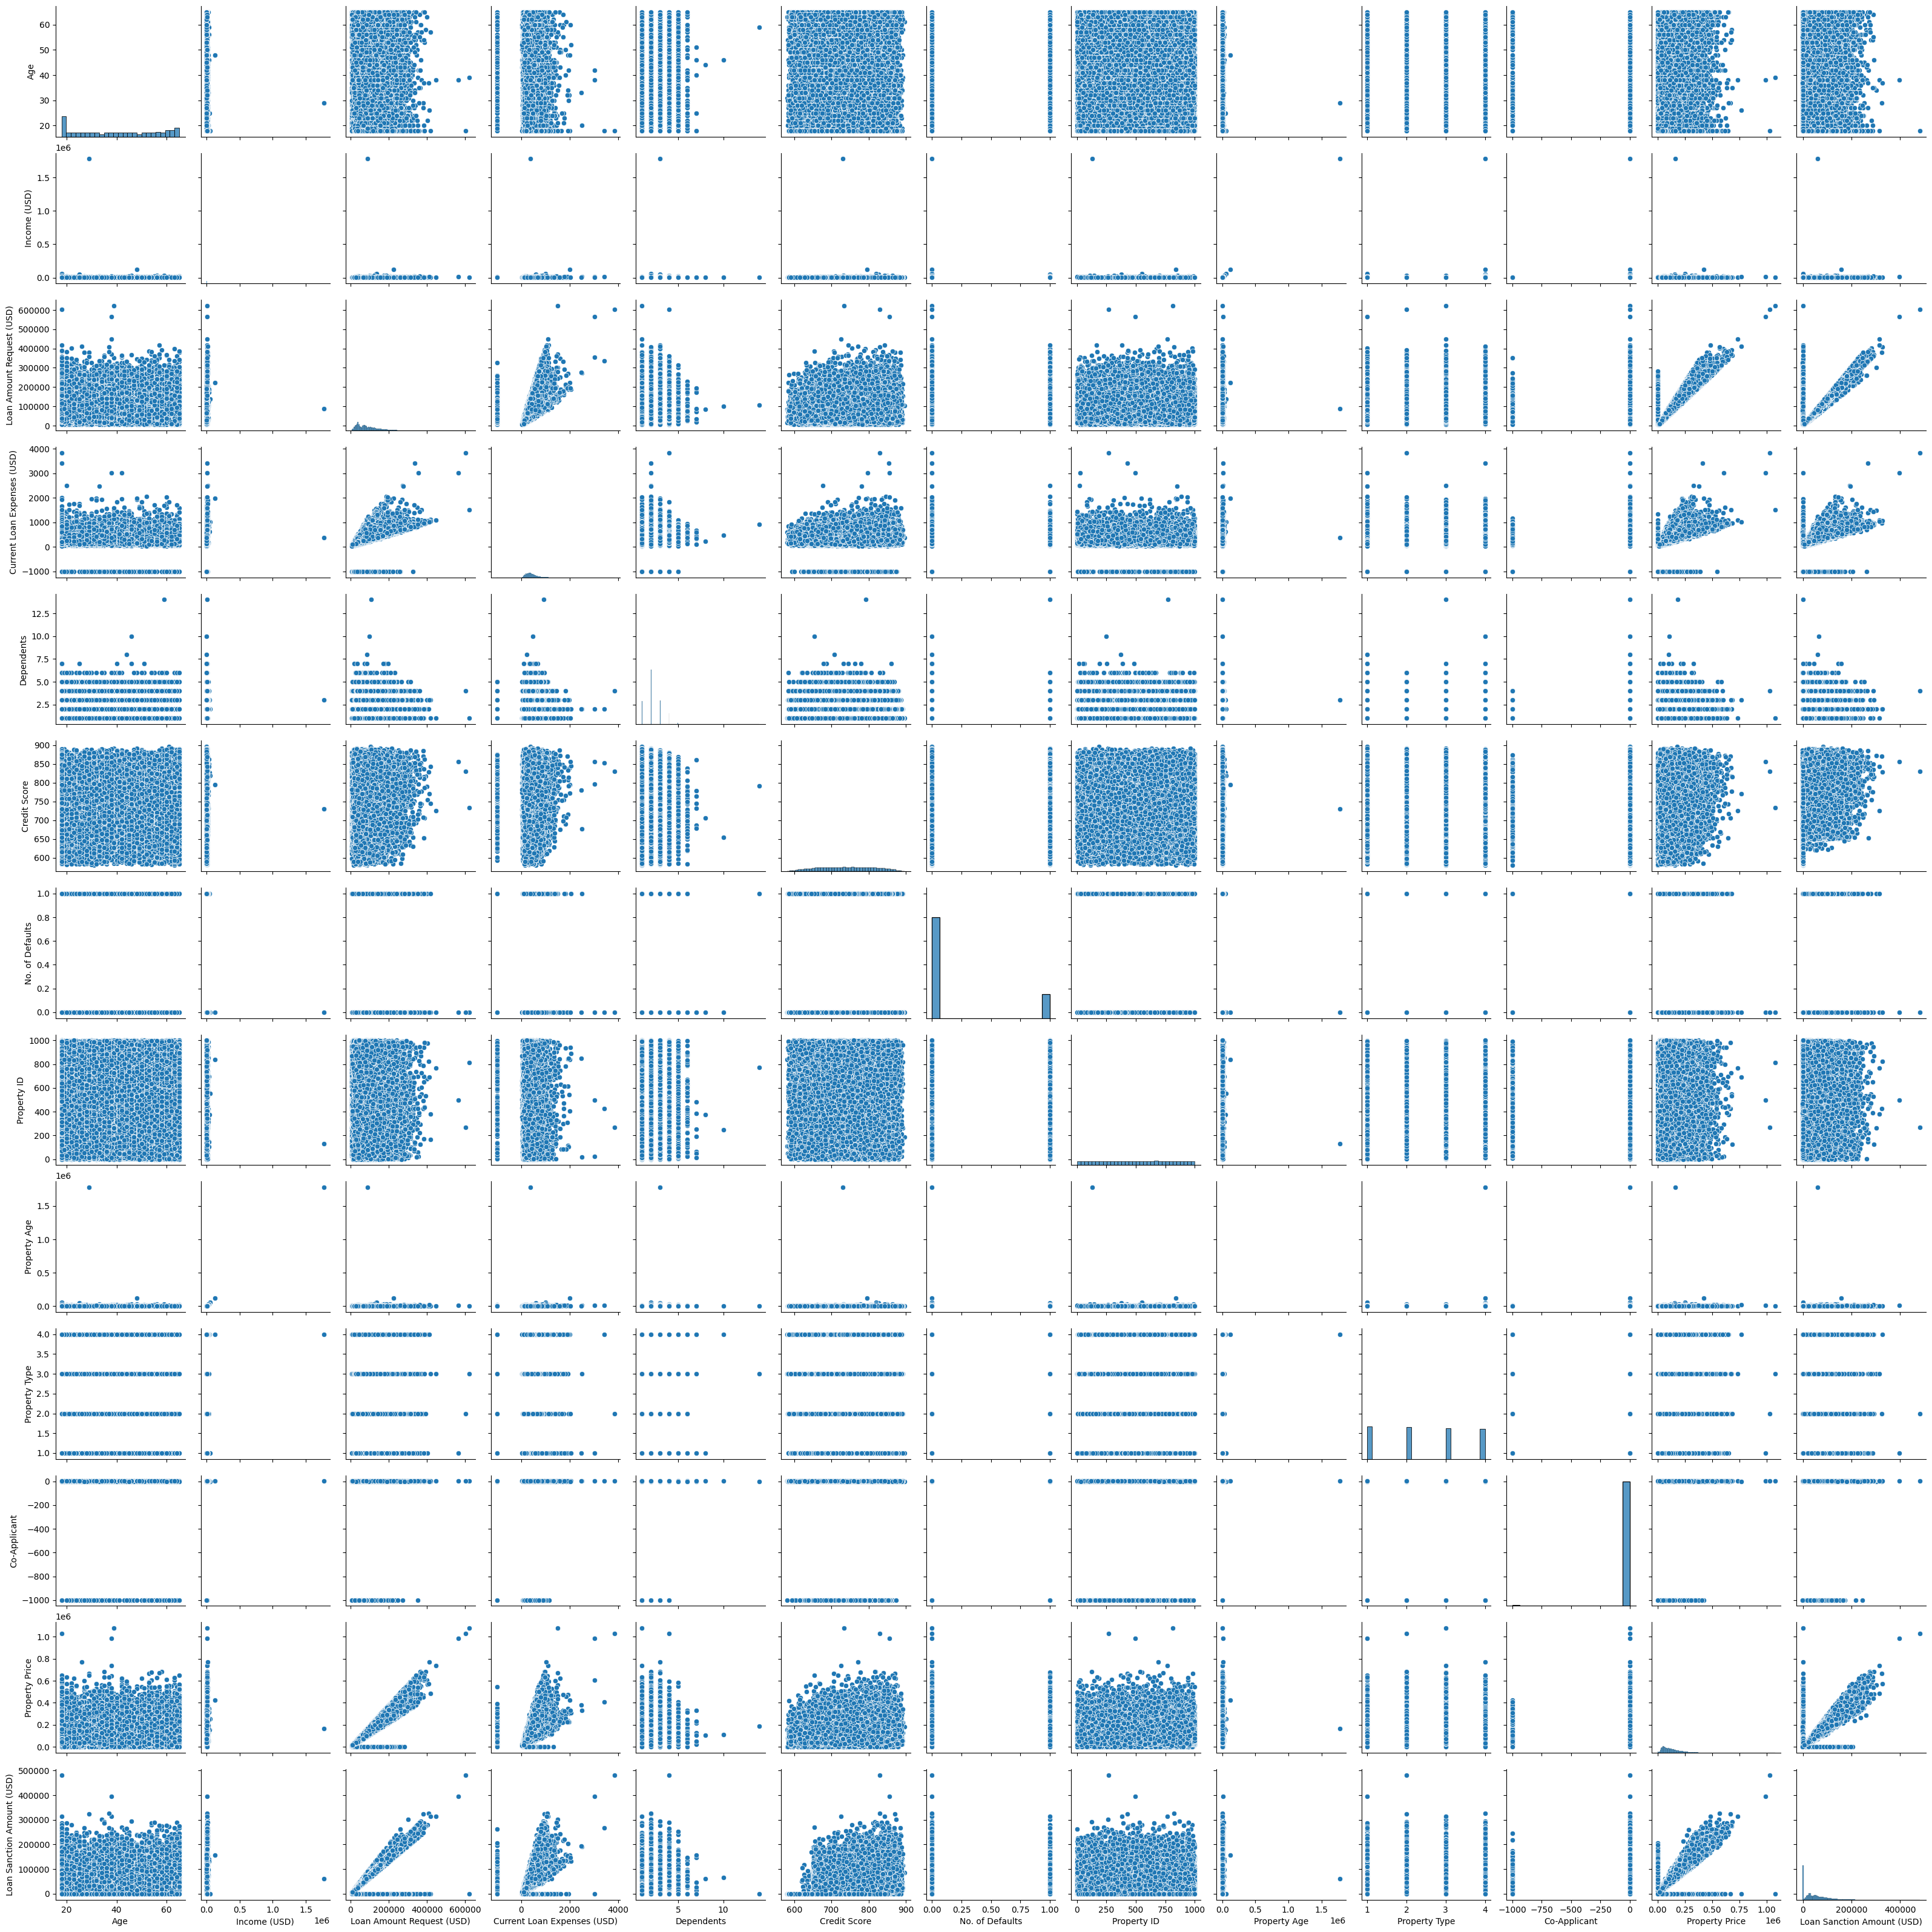

In [17]:
# Pairplot to understand relationships between numerical variables
sns.pairplot(numerical_data)
plt.show()

## Cleaning The Data

In [18]:
# 1. Identify column types
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# To decide appropriate methods, let's examine the missing values
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

# 2. Apply appropriate imputation techniques

# Fill numerical columns with mean or median
numerical_fill_mean = ['Age', 'Income (USD)', 'Credit Score', 'Property Price']
numerical_fill_median = ['Loan Amount Request (USD)', 'Loan Sanction Amount (USD)']

for col in numerical_cols:
    if col in numerical_fill_mean:
        data[col].fillna(data[col].mean(), inplace=True)
    elif col in numerical_fill_median:
        data[col].fillna(data[col].median(), inplace=True)
    else:
        data[col].interpolate(method='linear', inplace=True)

# Fill categorical columns with mode
for col in categorical_cols:
    if data[col].nunique() > 1:
        data[col].fillna(data[col].mode()[0], inplace=True)

# Verify the data
print("\nMissing values after cleaning:")
print(data.isnull().sum())

# Save the cleaned data to a new CSV file
data.to_csv('Loan_Cleaned.csv', index=False)

# Display the cleaned data
data.head()


Missing values per column:
Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

Missing values after cleaning:
Customer ID                    0
Name                           

C:\Users\mehta\AppData\Local\Temp\ipykernel_2656\2945755357.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\mehta\AppData\Local\Temp\ipykernel_2656\2945755357.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56   1933.050000              Low   
1     C-33999  America Calderone      M   32   4952.910000              Low   
2      C-3770      Rosetta Verne      F   65    988.190000             High   
3     C-26480         Zoe Chitty      F   65   2630.574417             High   
4     C-23459       Afton Venema      F   31   2614.770000              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working               Laborers  Semi-Urban                   46837.47   
2  Pensioner               Laborers  Semi-Urban                   45593.04   
3  Pensioner               Laborers       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   ...  Credit Score No. of Defaults Has Active Credit Card  Property ID  \
0  ...        809.44               0                 Active          746   
1  ...        780.40               0            Unpossessed          608   
2  ...        833.15               0            Unpossessed          546   
3  ...        832.70               1            Unpossessed          890   
4  ...        745.55               1                 Active          715   

   Property Age  Property Type Property Location  Co-Applicant  \
0       1933.05              4             Rural             1   
1       4952.91              2             Rural             1   
2        988.19              2             Urban             0   
3       1801.48              2        Semi-Urban             1   
4       2614.77              4        Semi-Urban             1   

   Property Price  Loan Sanction Amount (USD)  
0       119933.46                    54607.18  
1        54791.00                    37469.98  
2        72440.58                    36474.43  
3       121441.51                    56040.54  
4       208567.91                    74008.28  

[5 rows x 24 columns]

## Removing Outliers 

### Lets Visualize First

1. Boxplot

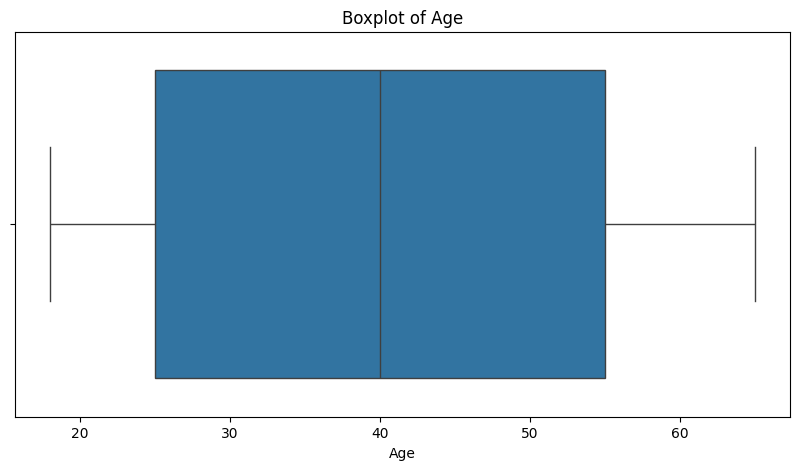

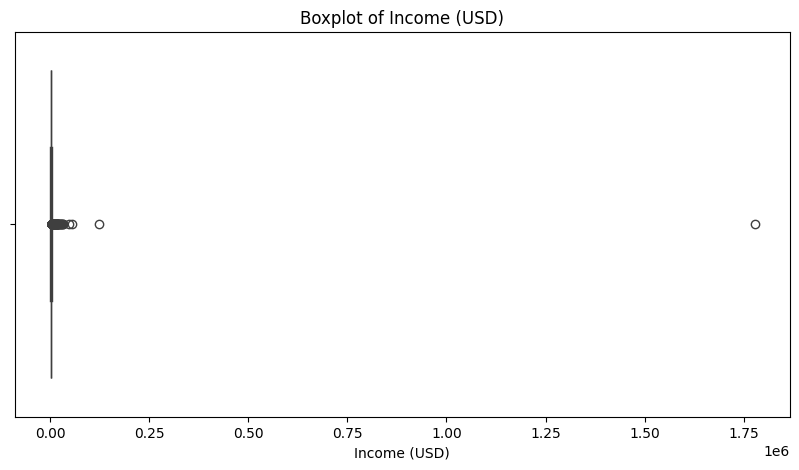

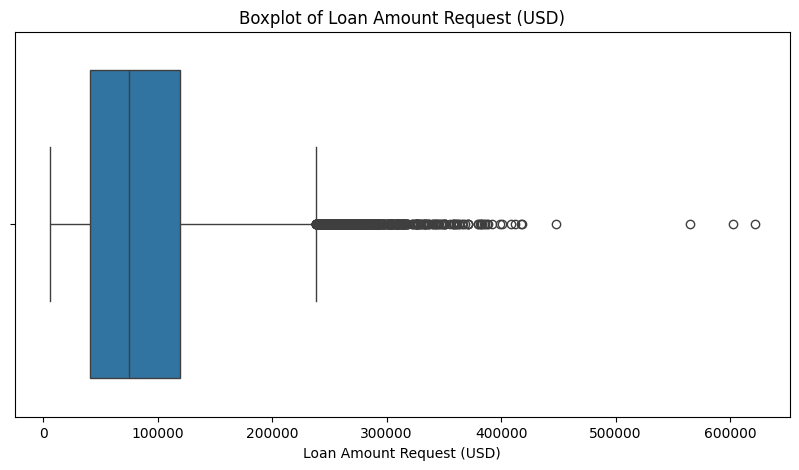

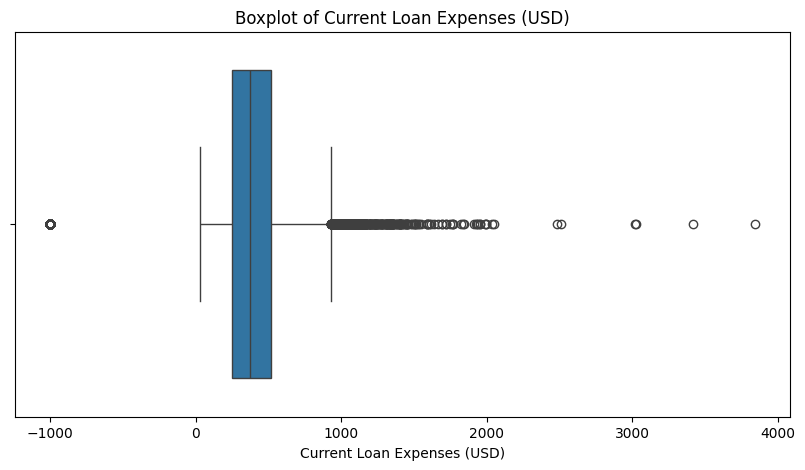

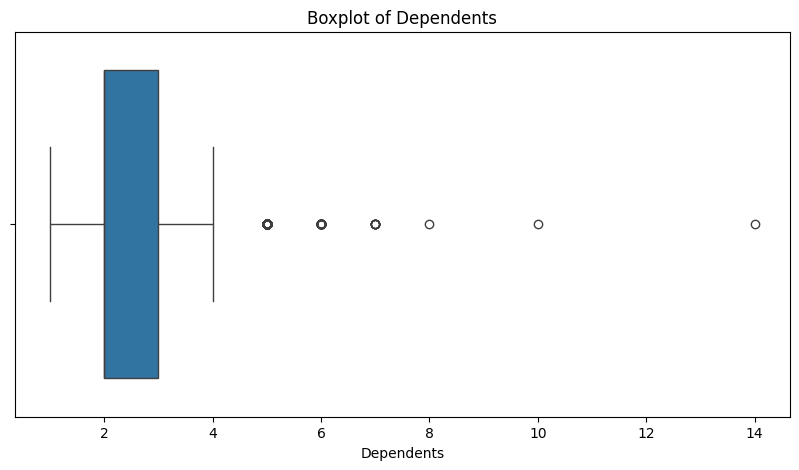

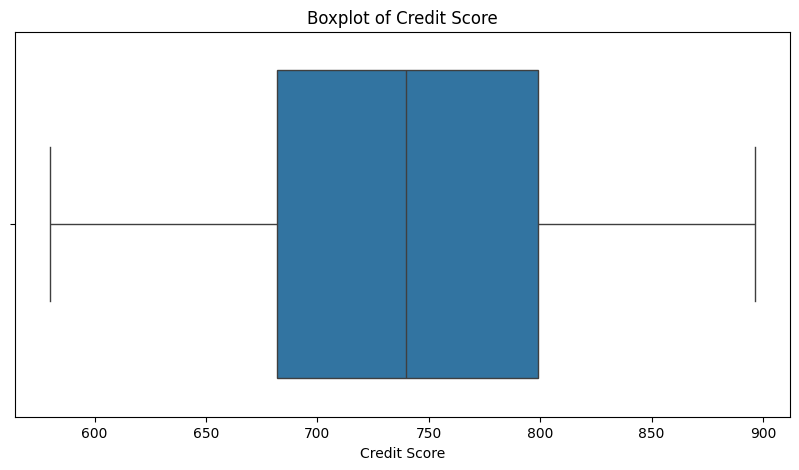

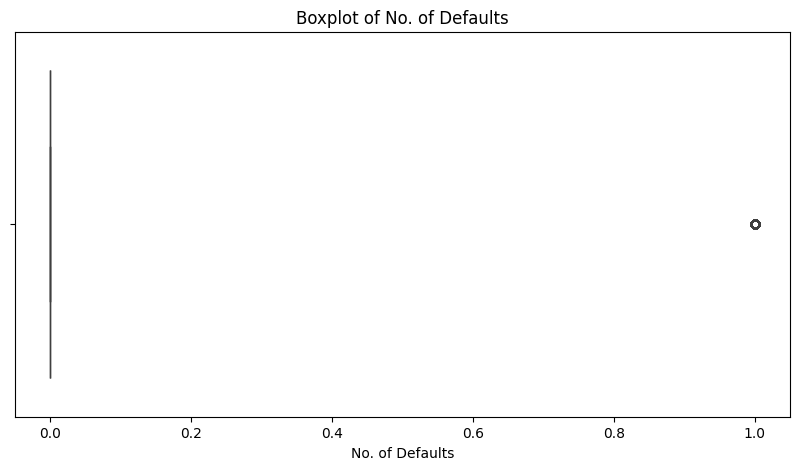

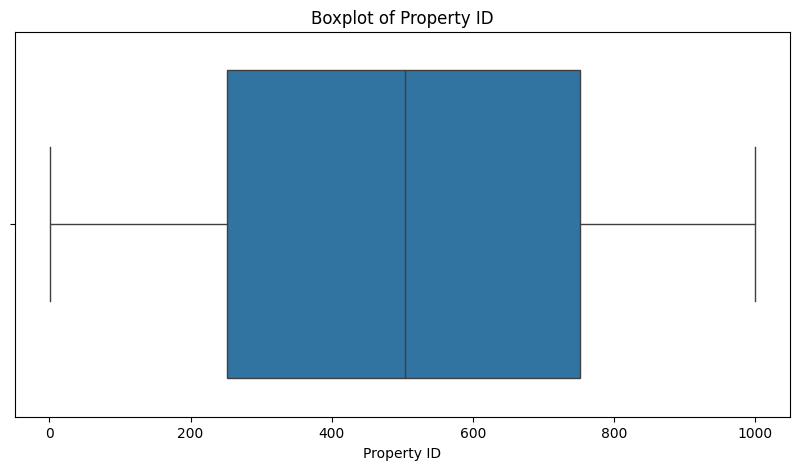

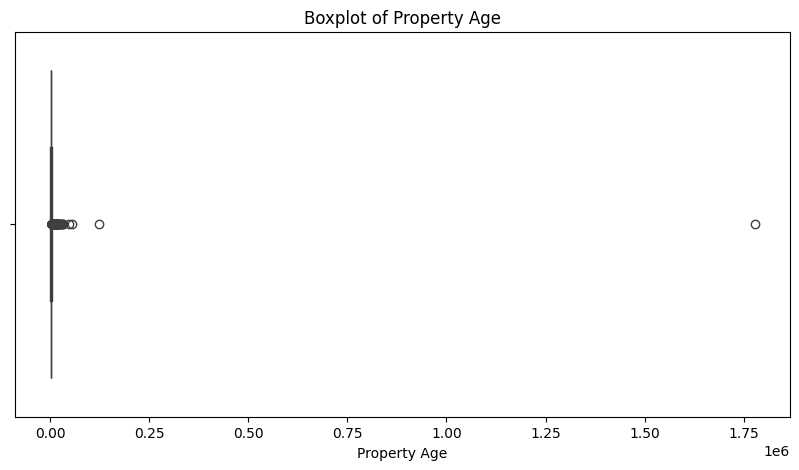

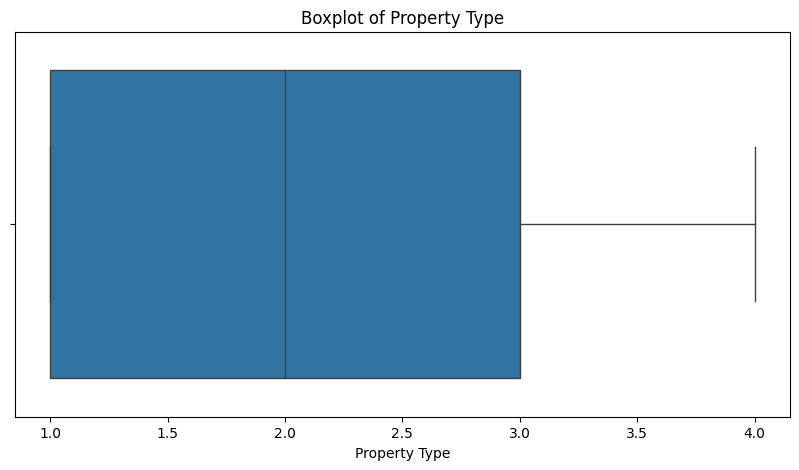

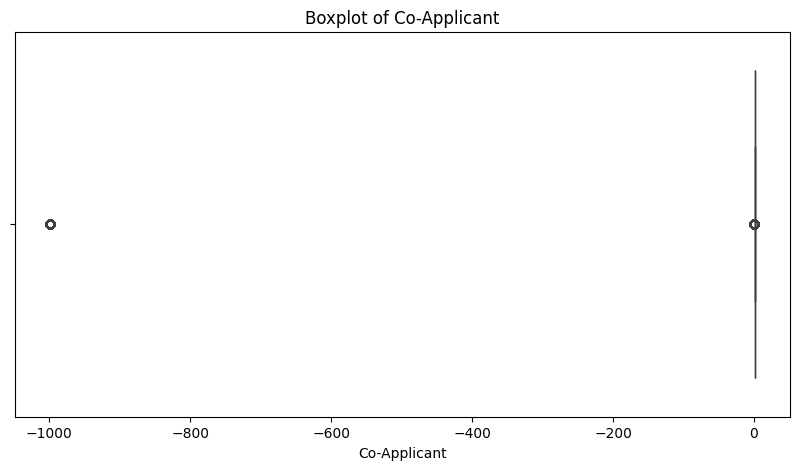

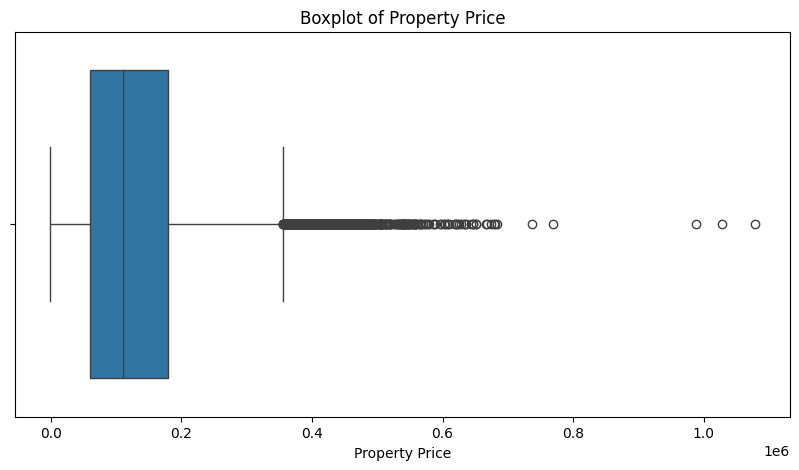

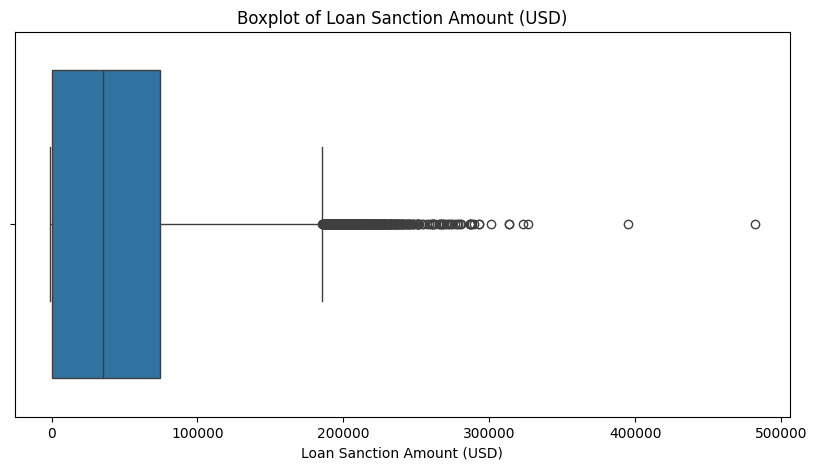

In [31]:
# Create boxplots for numerical columns
for col in data.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


2. Scatter Plot

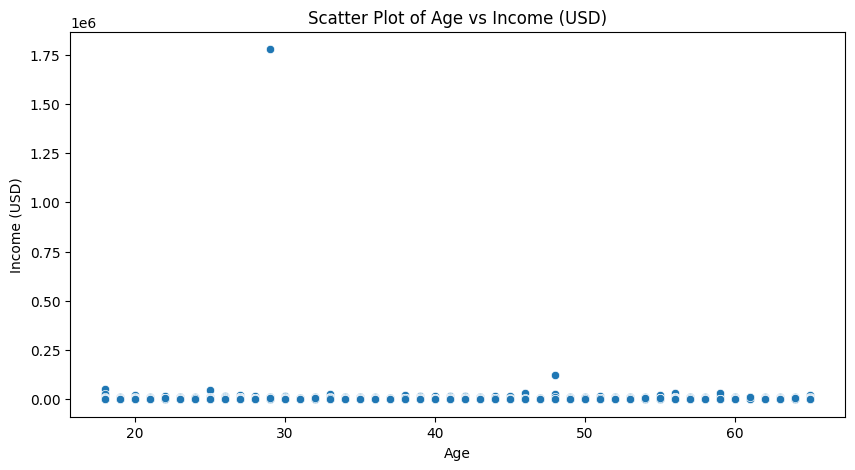

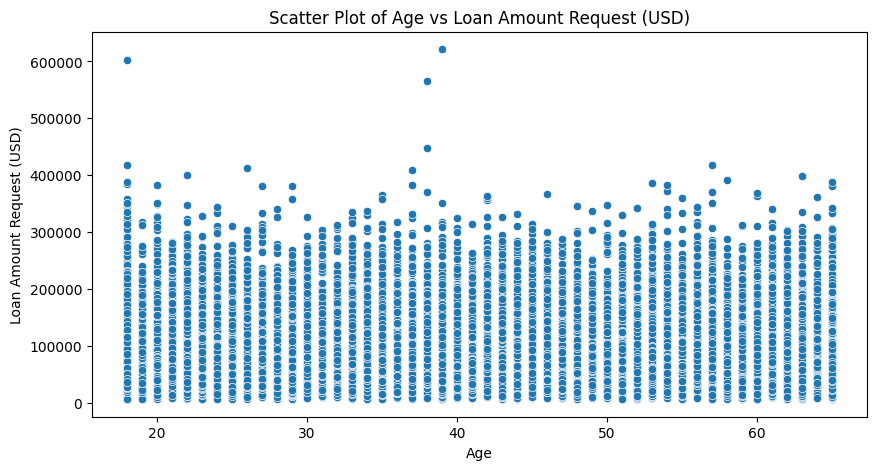

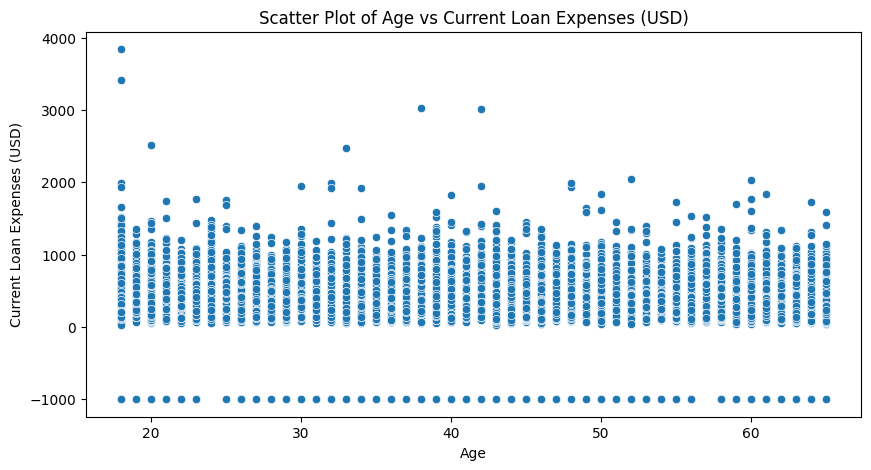

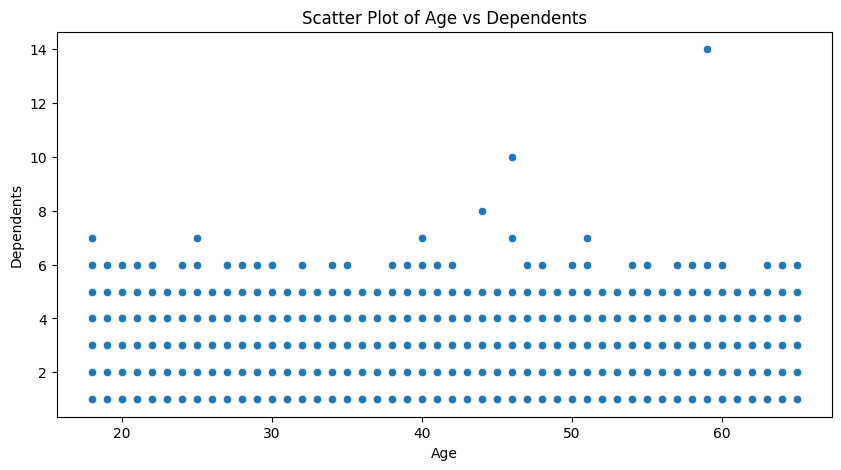

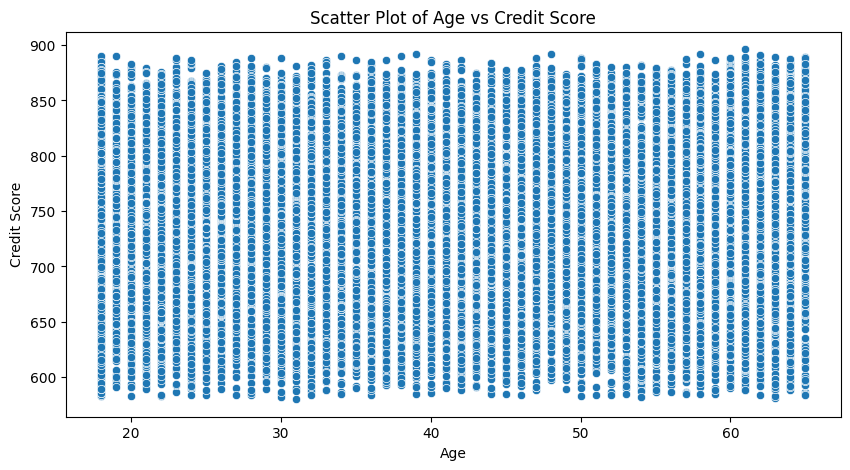

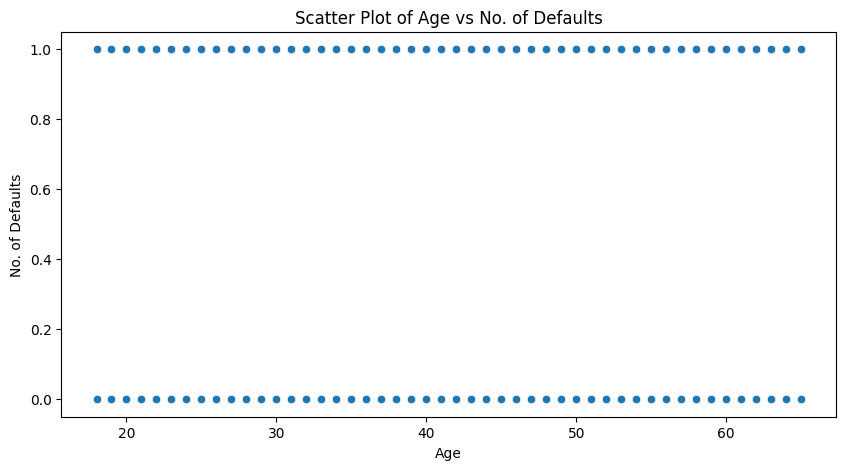

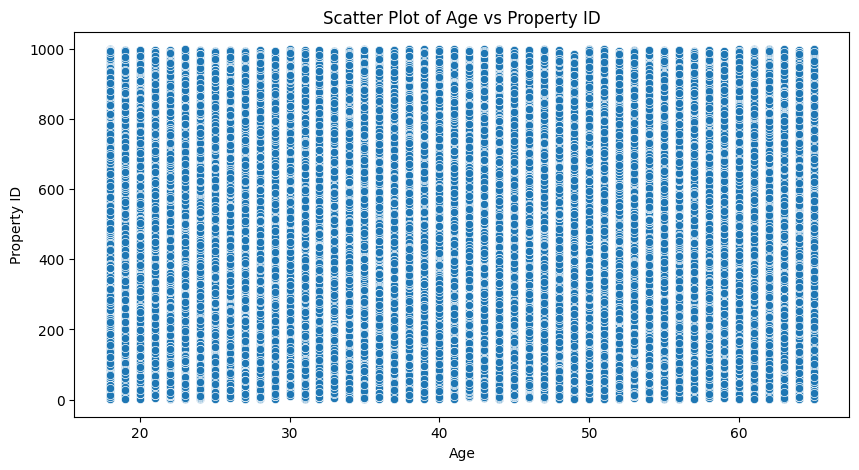

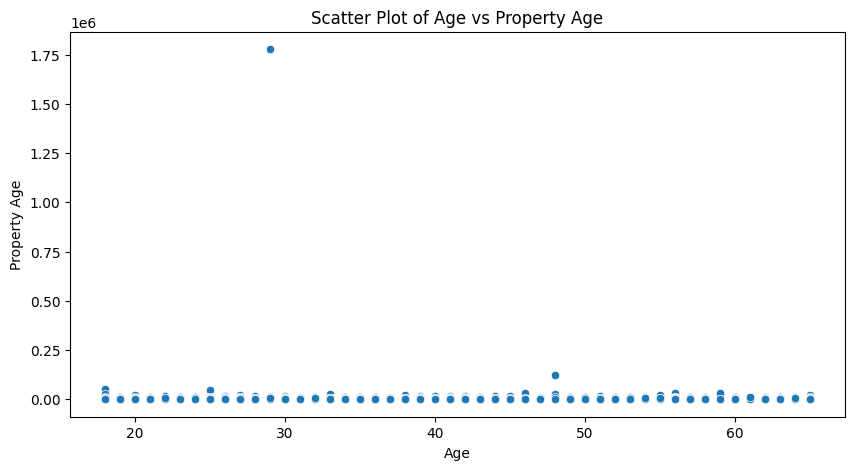

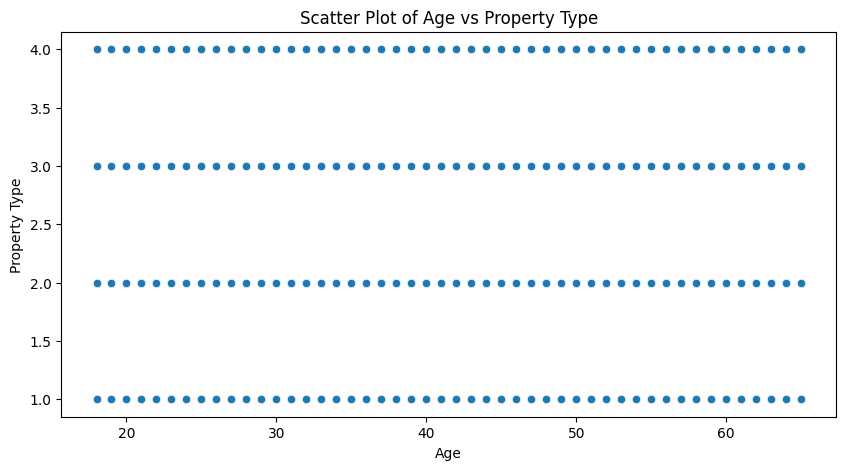

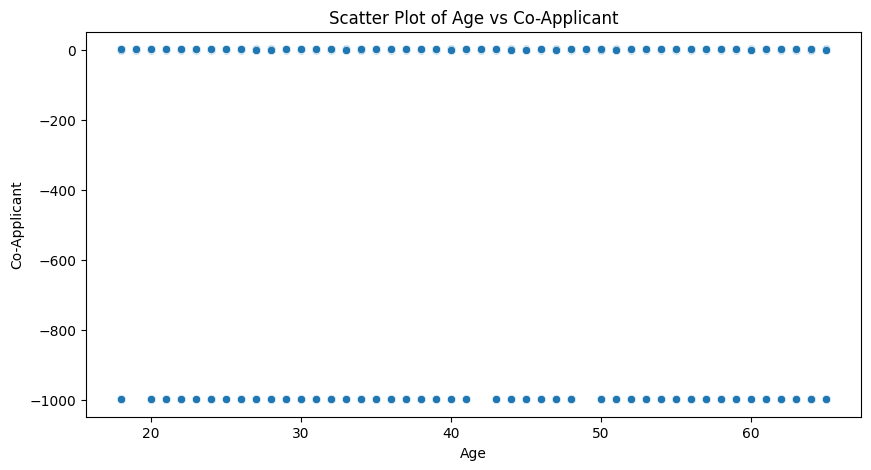

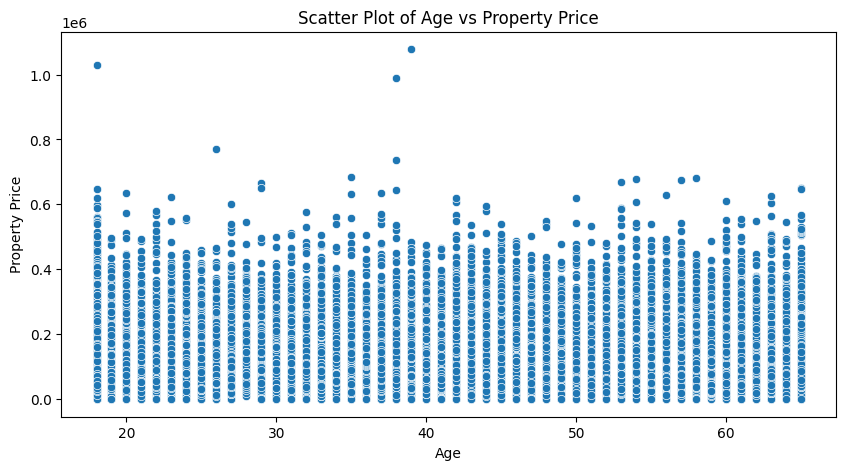

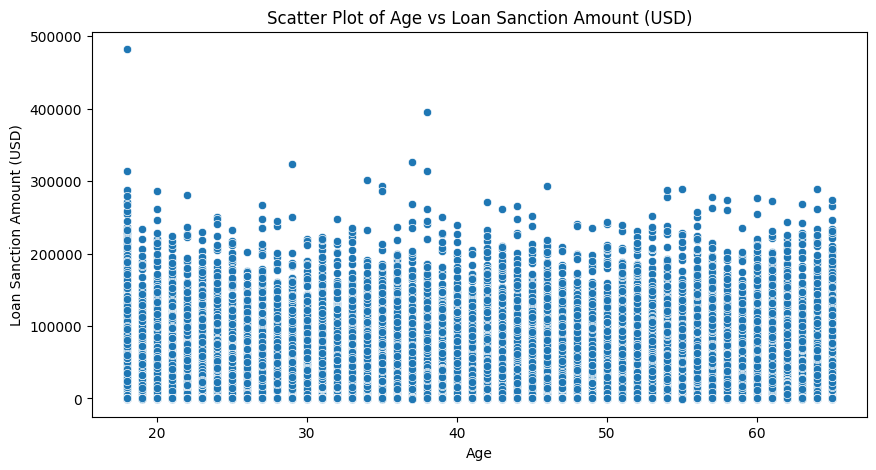

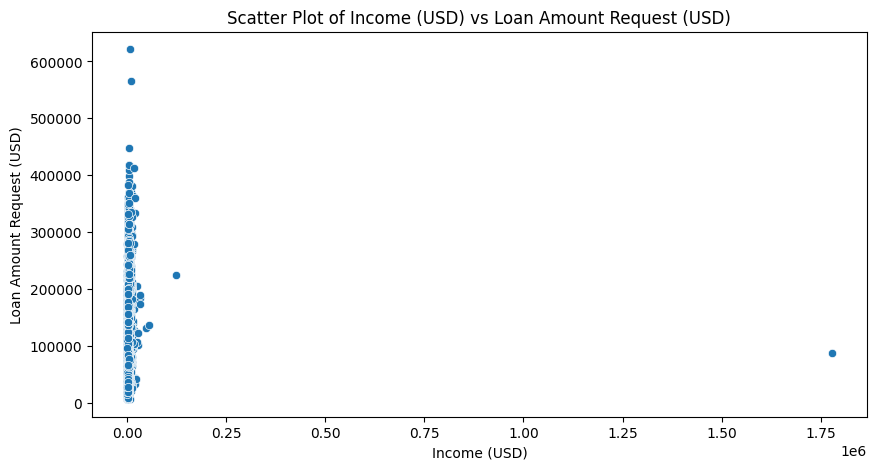

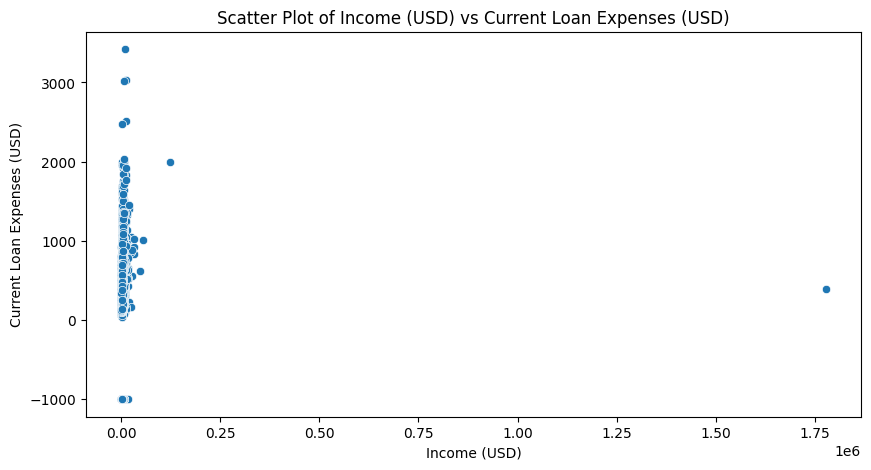

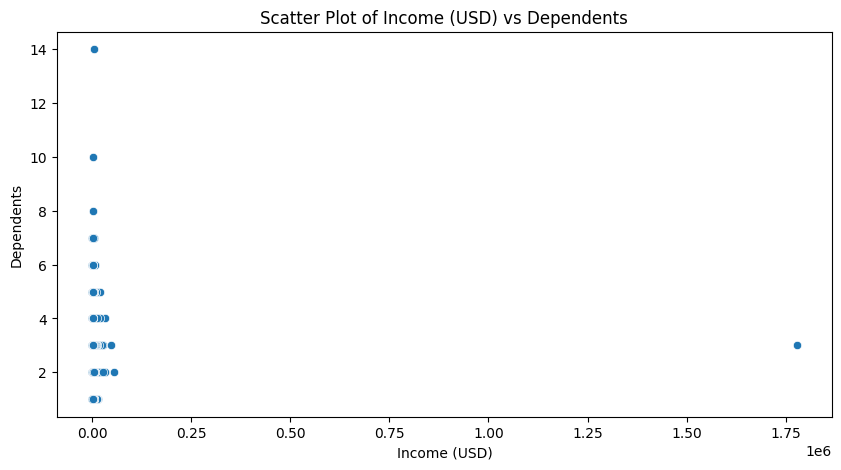

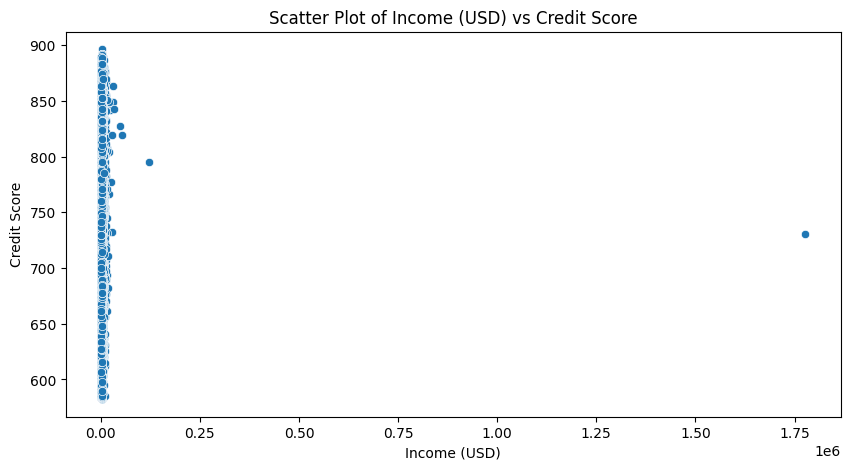

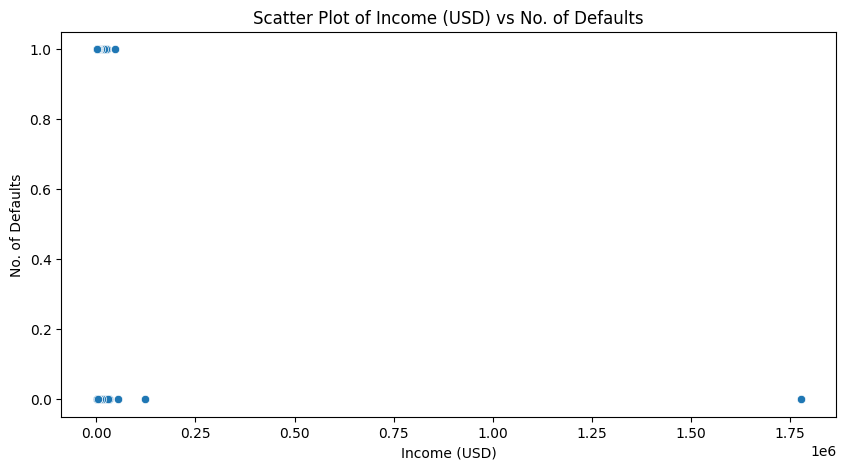

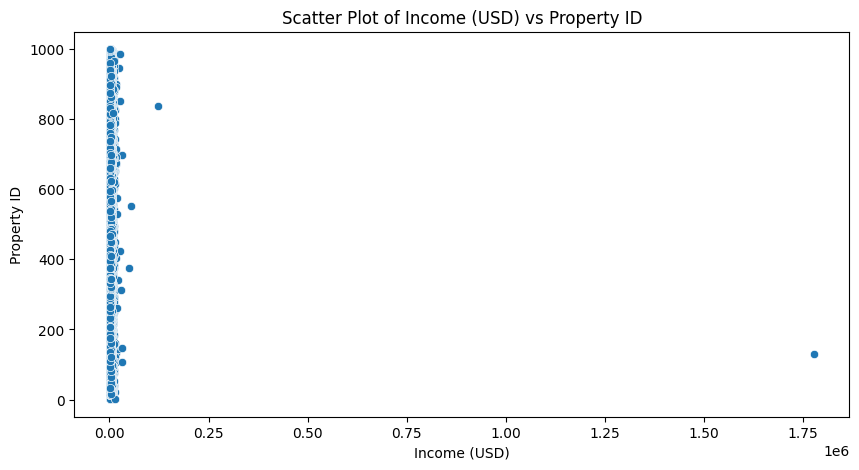

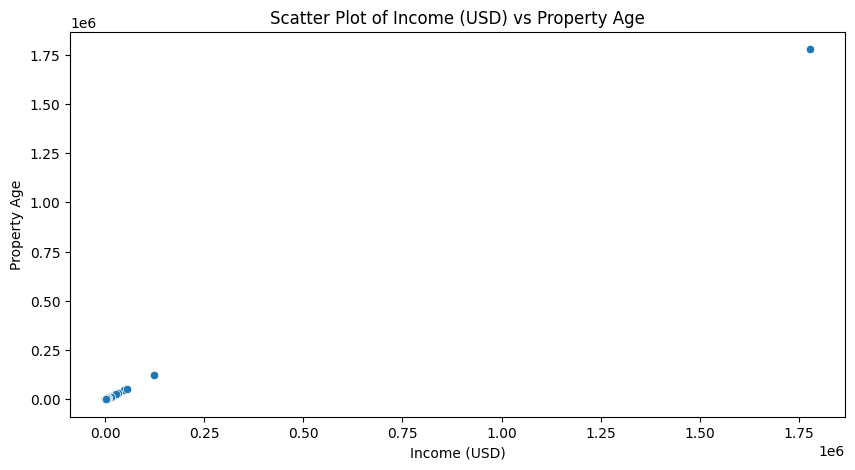

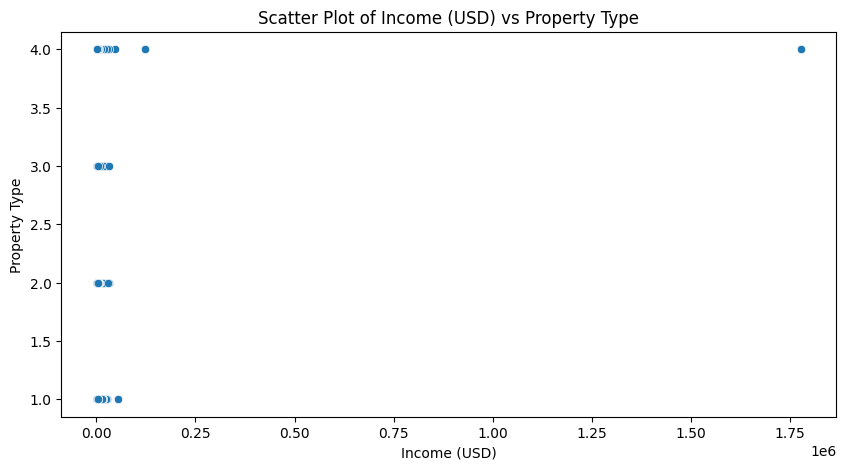

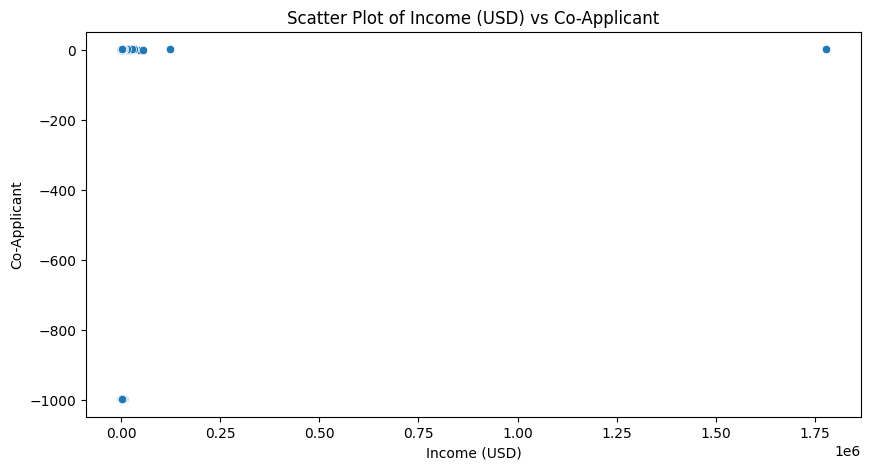

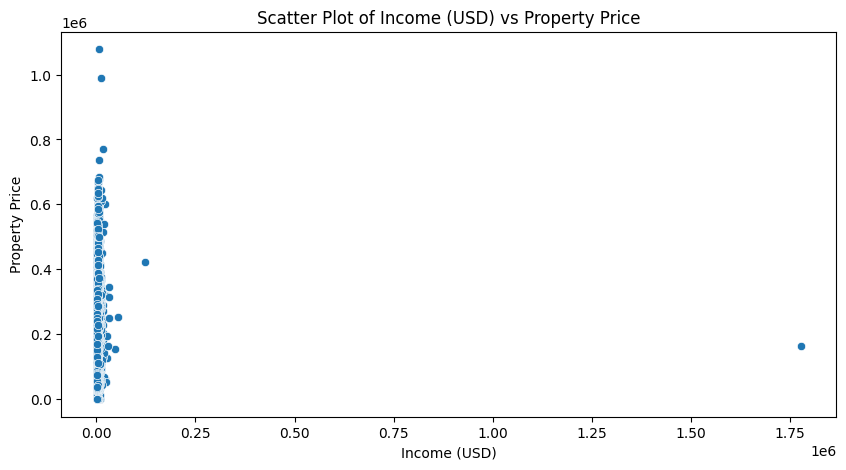

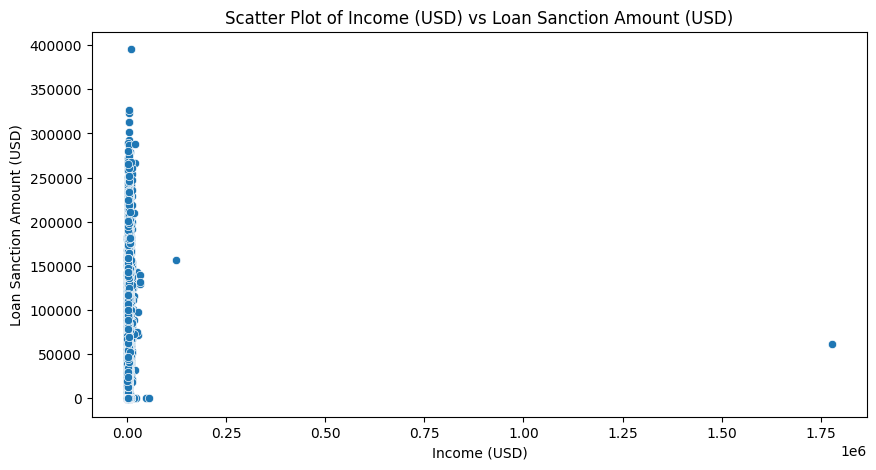

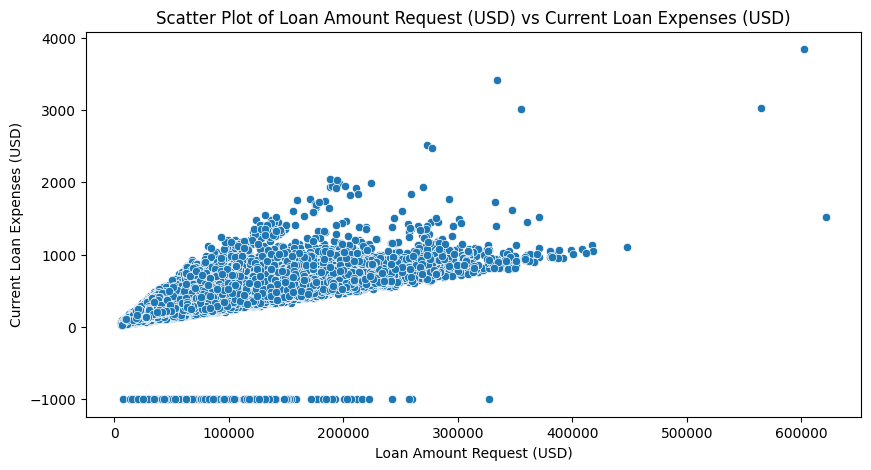

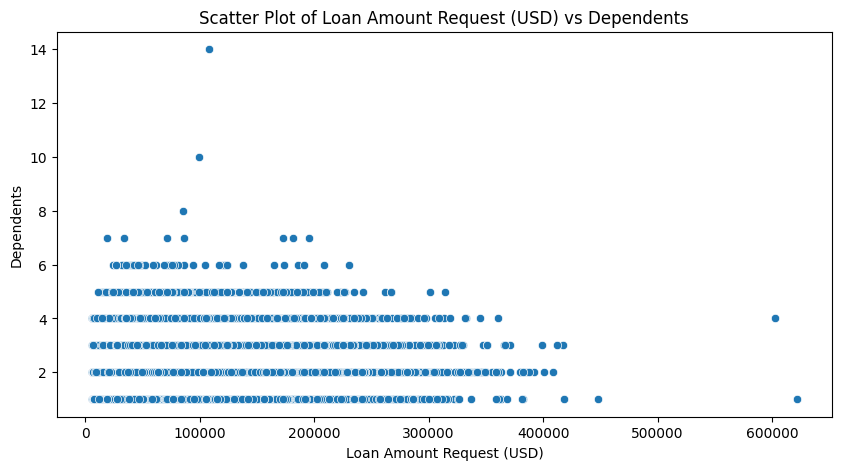

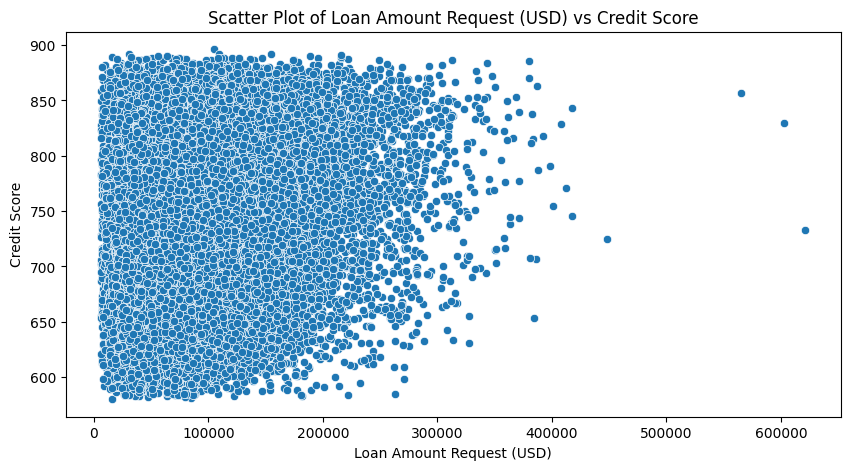

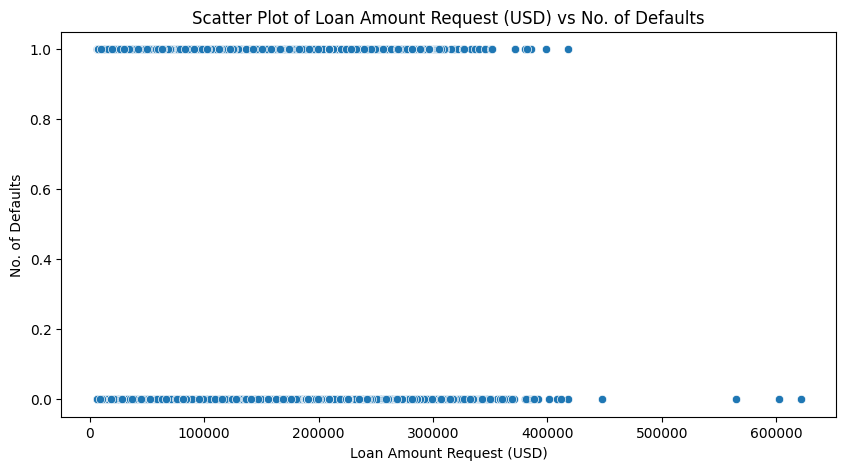

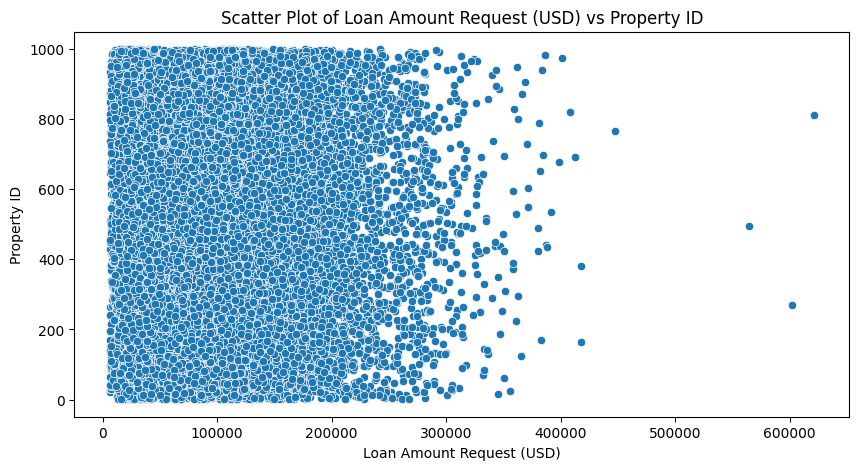

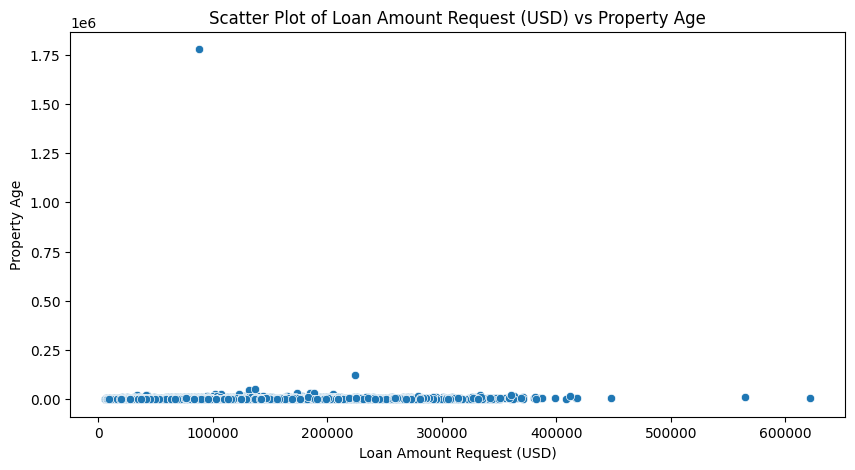

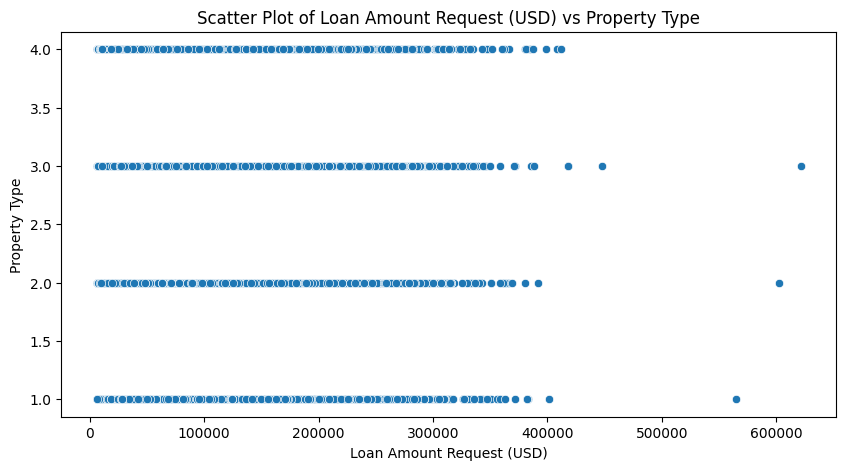

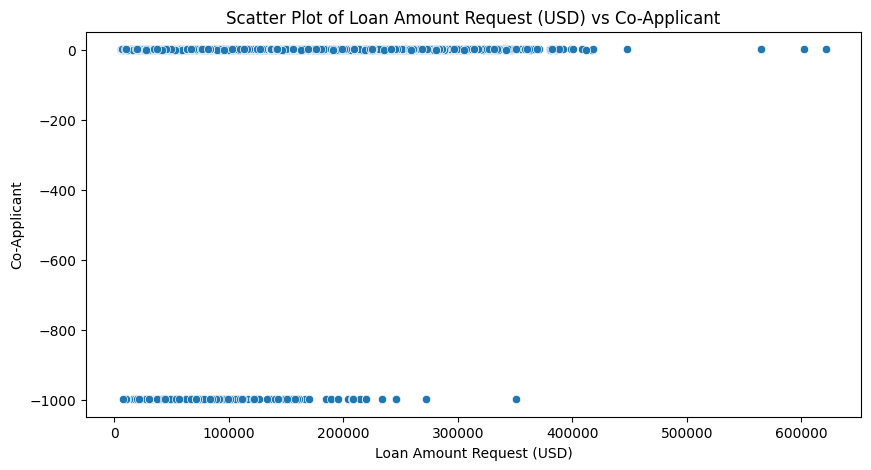

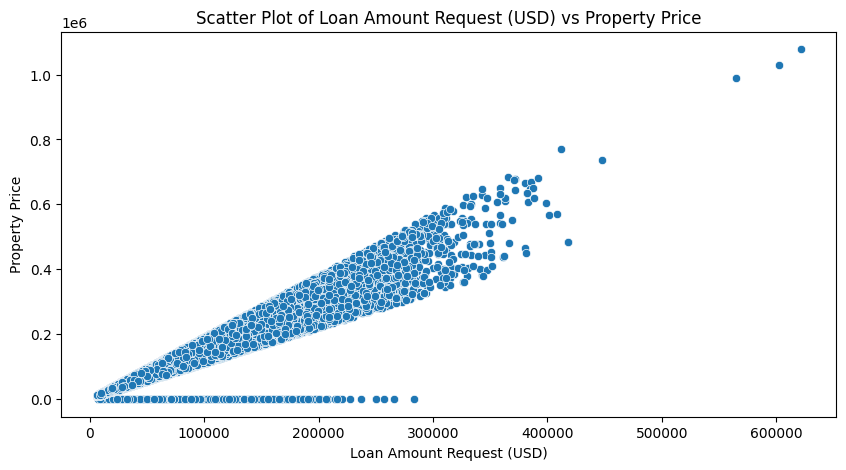

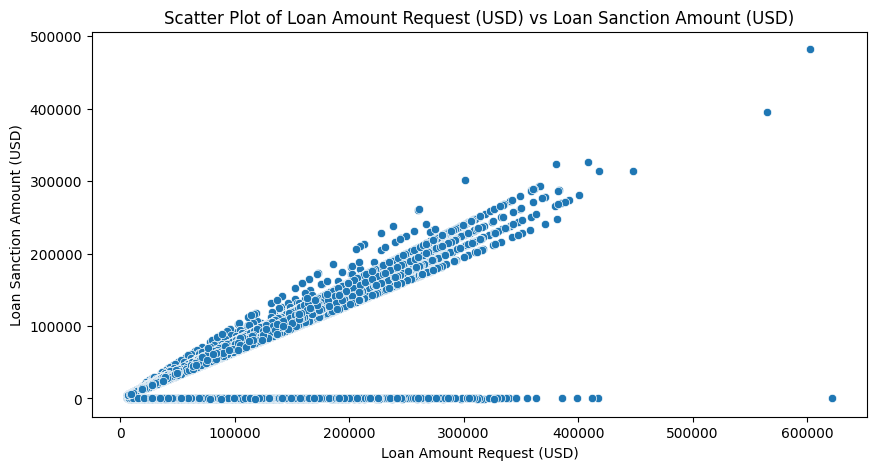

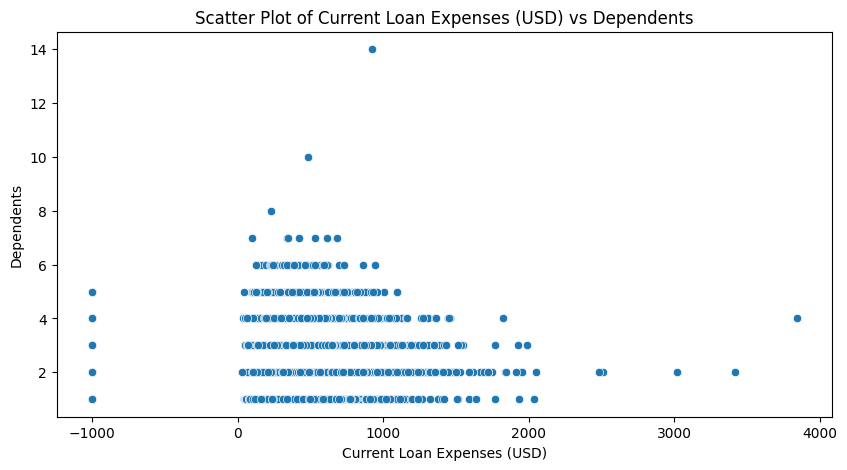

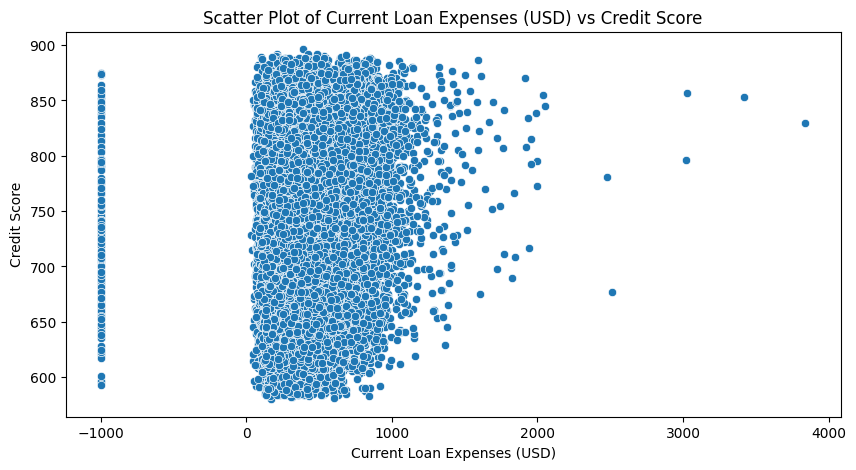

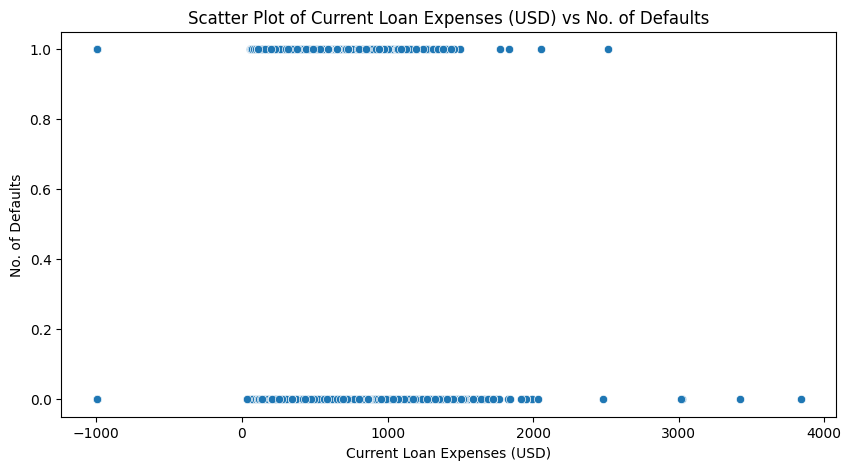

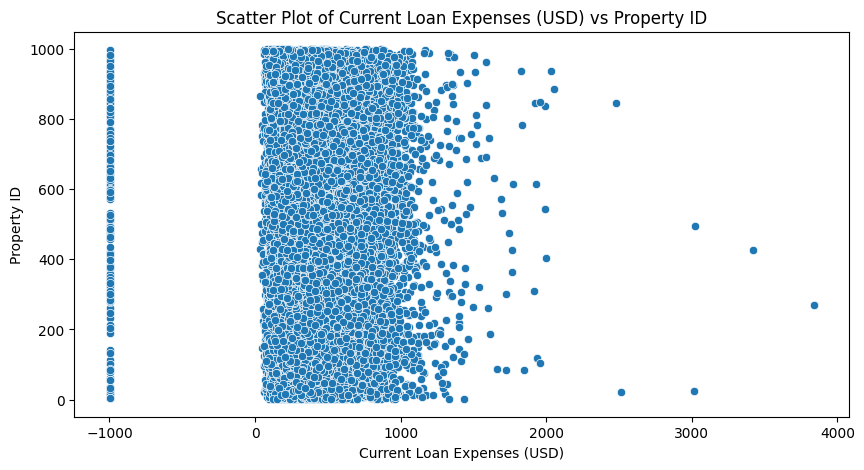

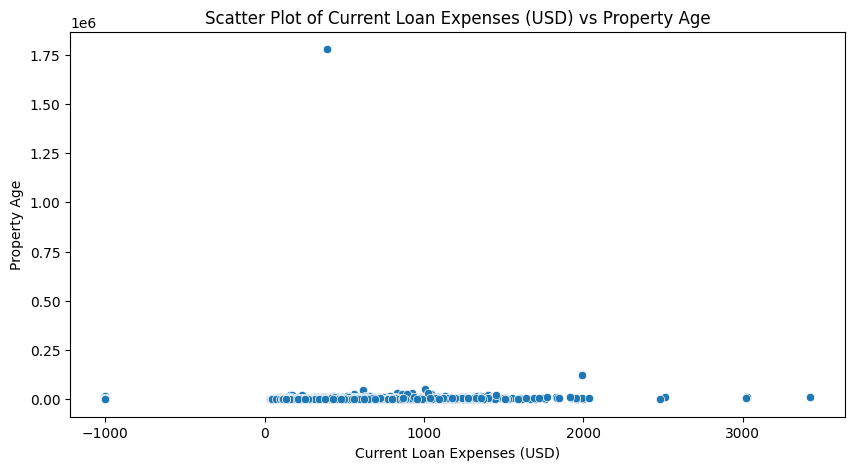

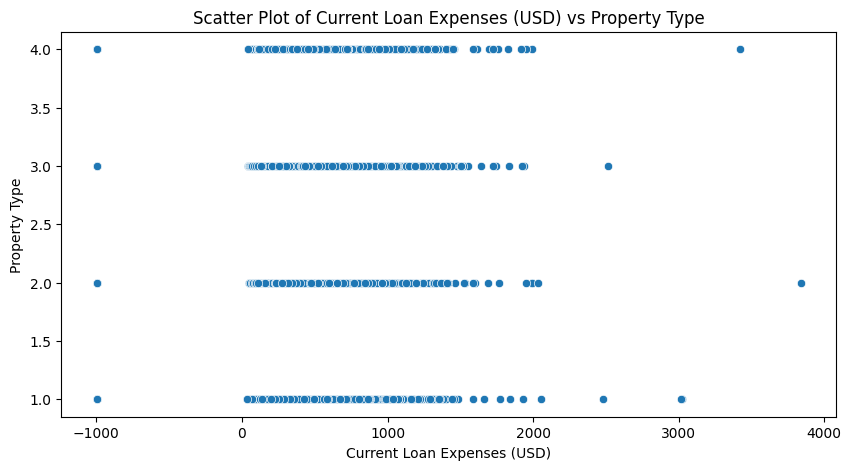

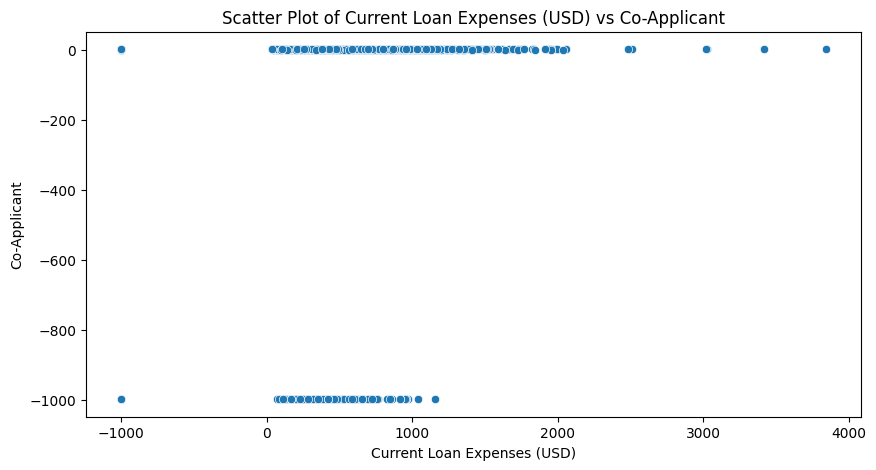

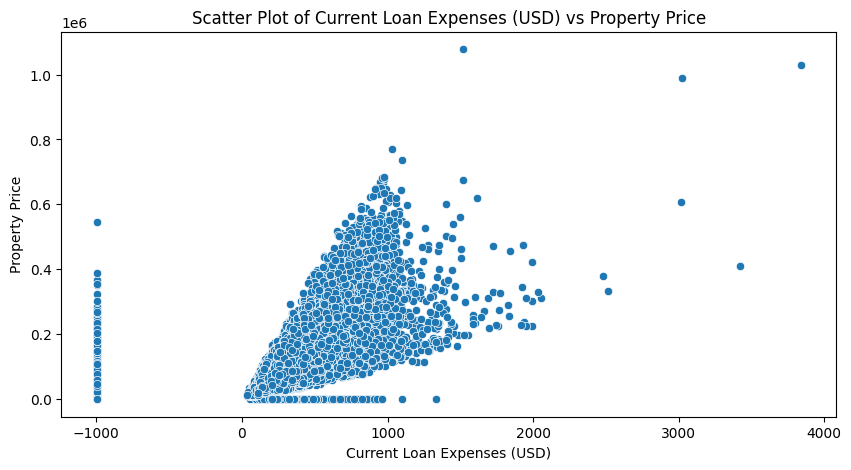

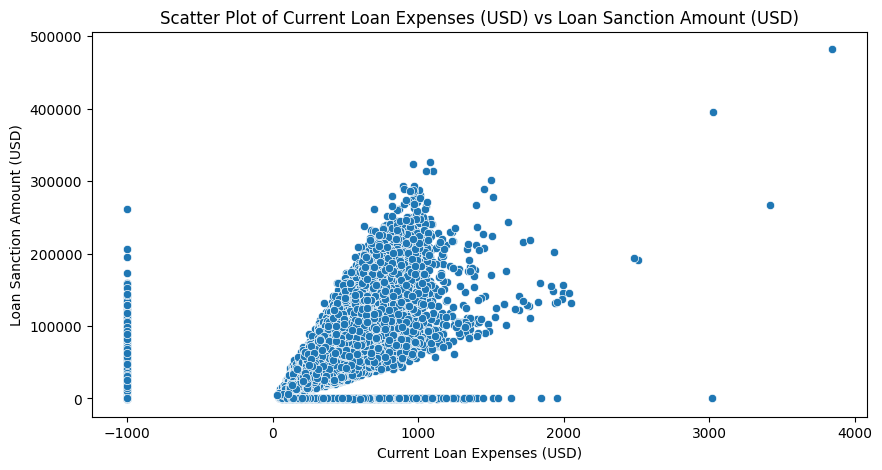

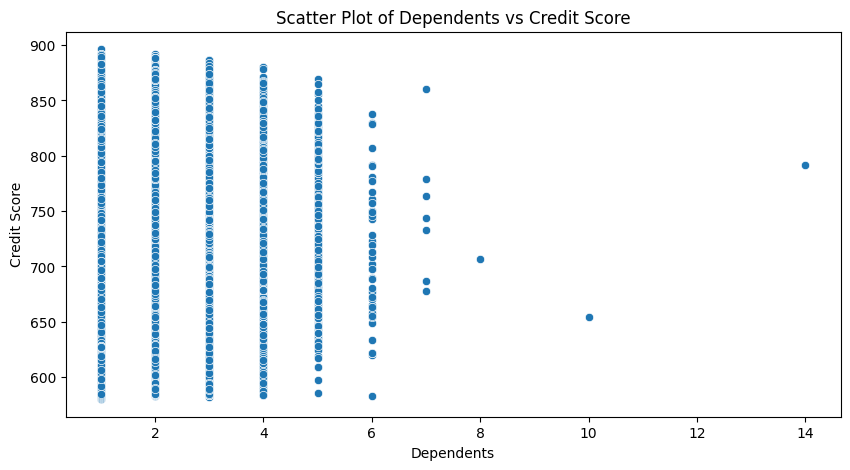

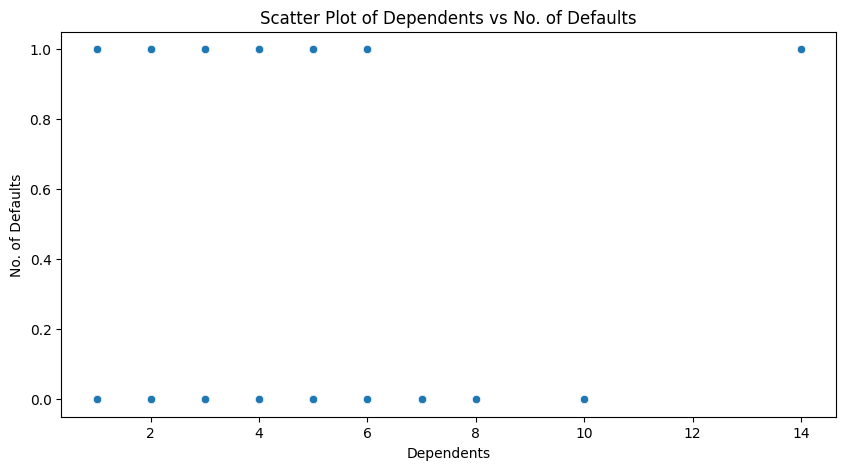

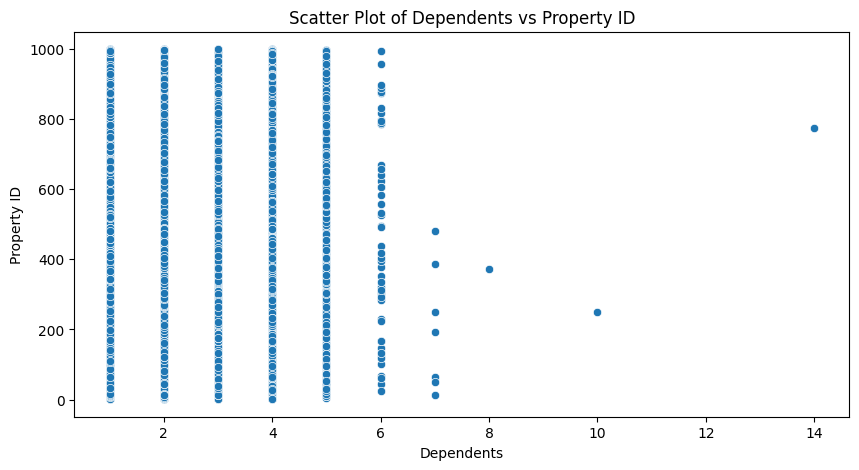

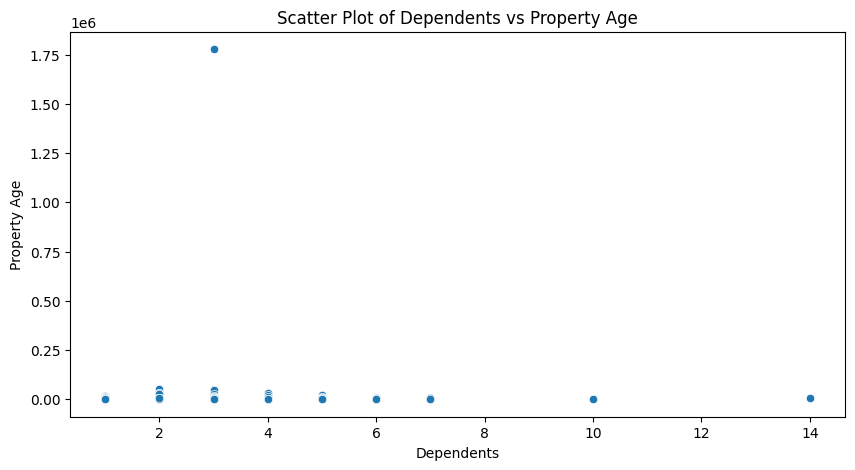

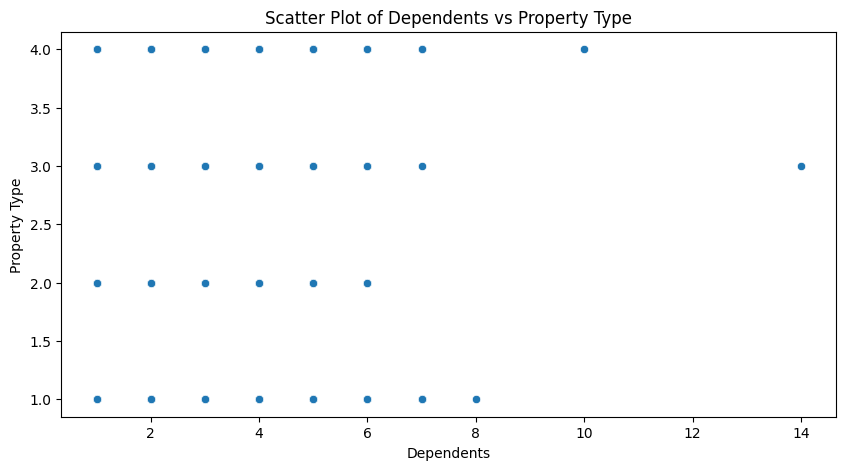

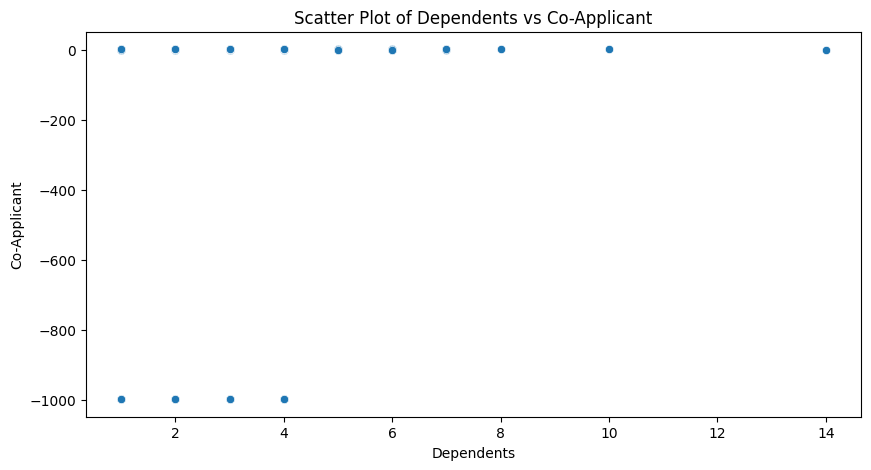

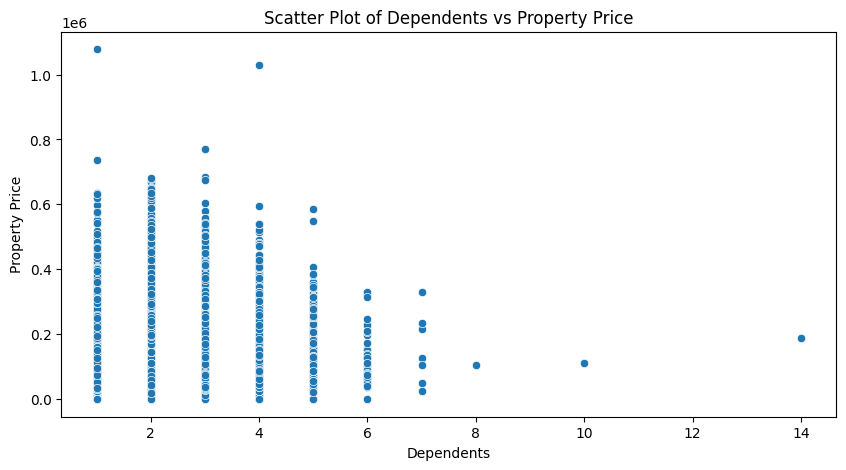

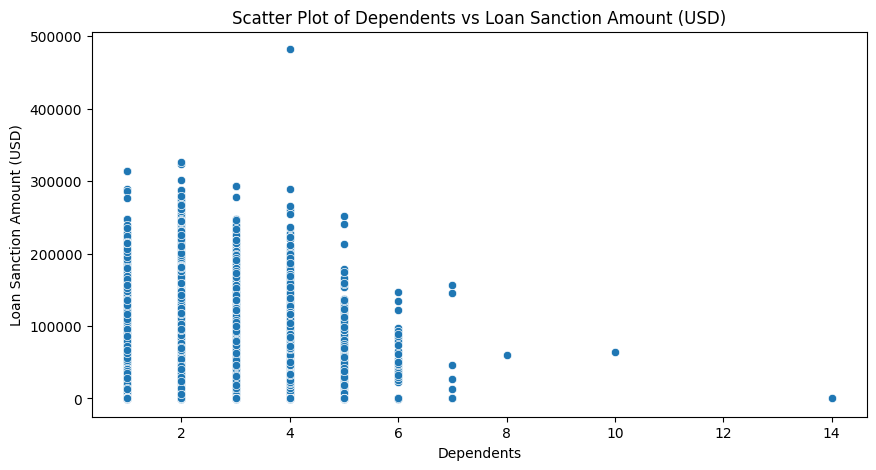

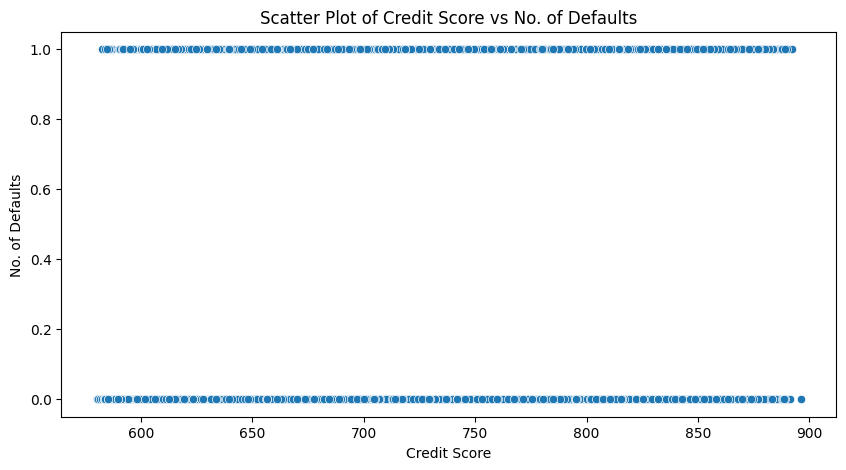

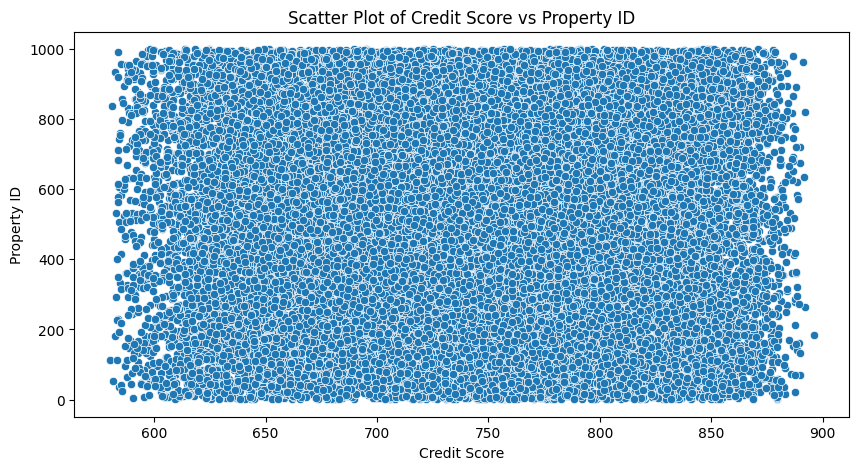

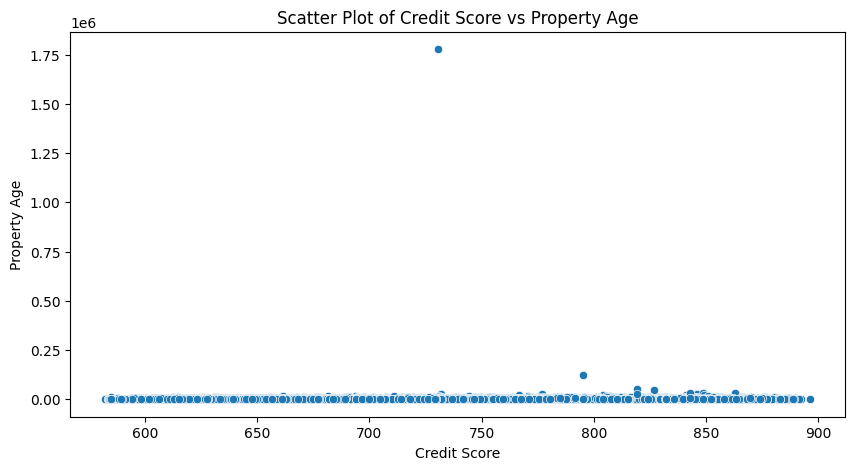

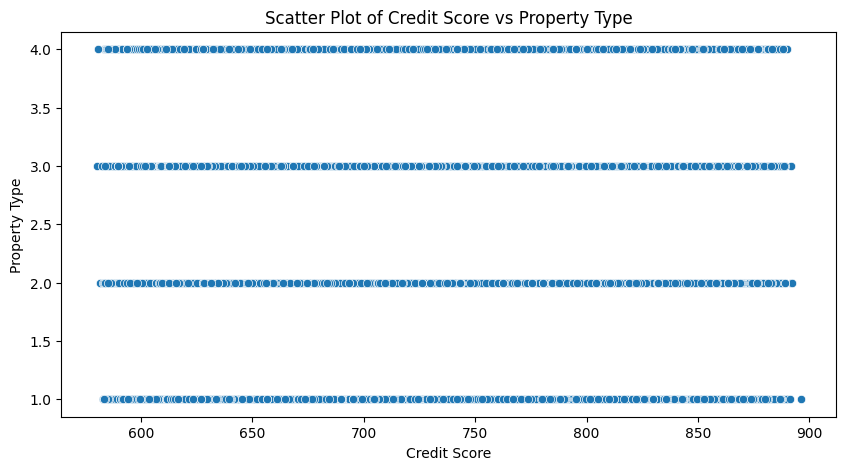

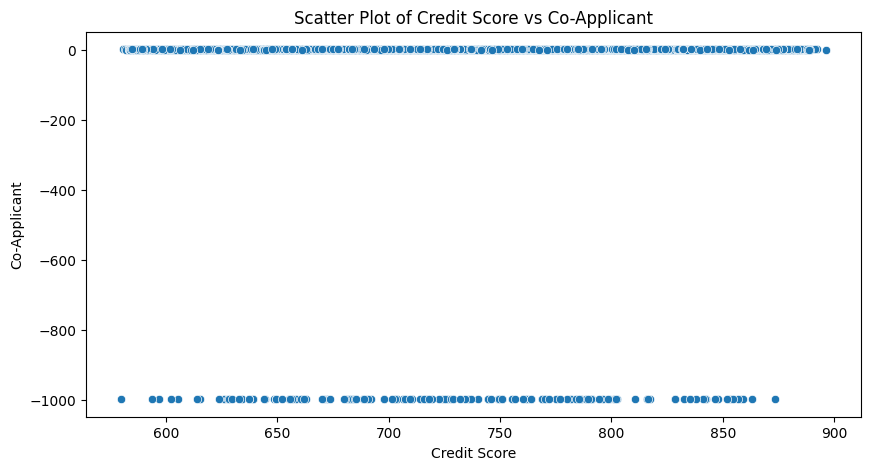

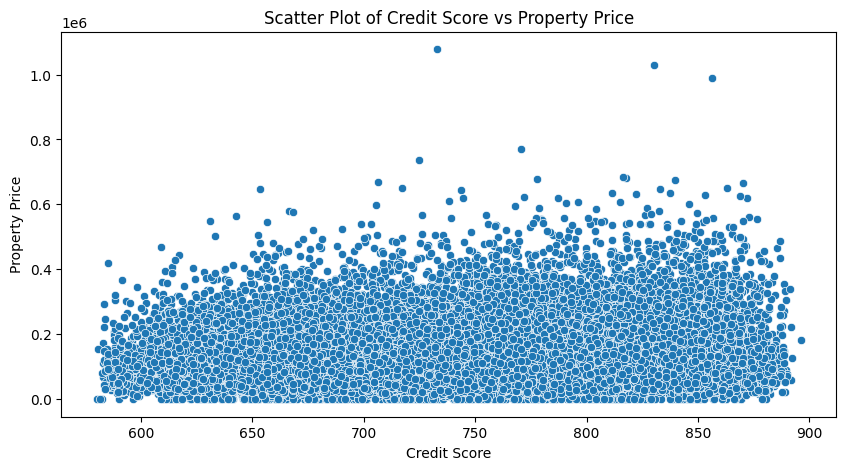

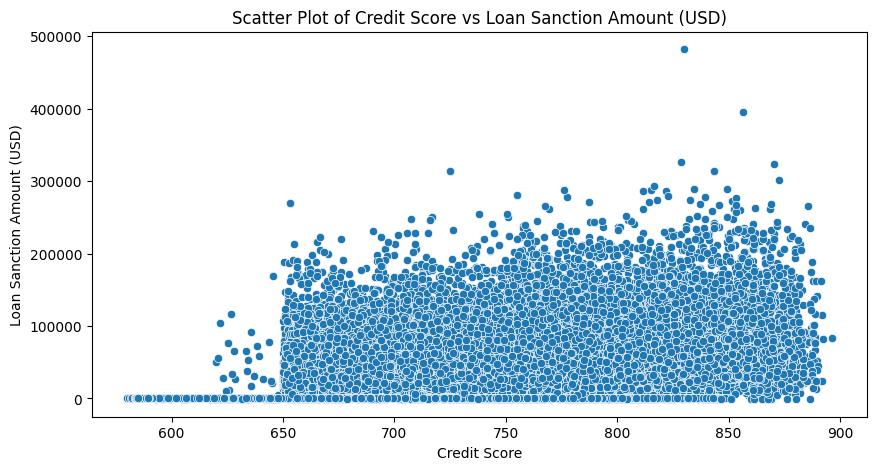

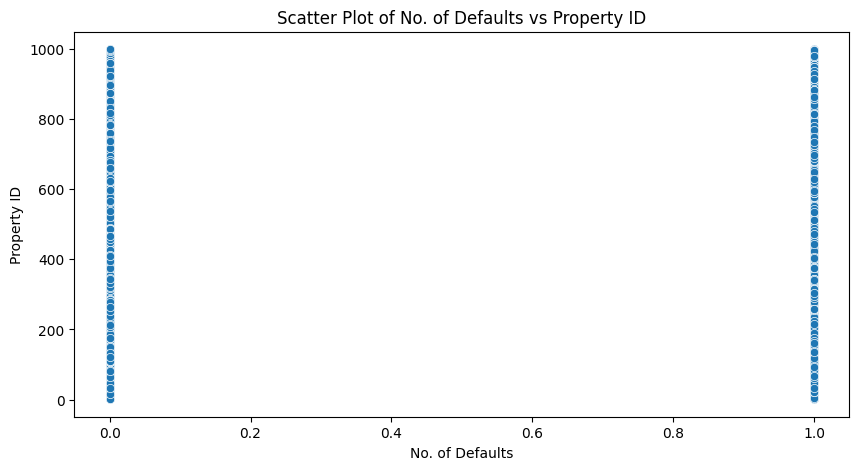

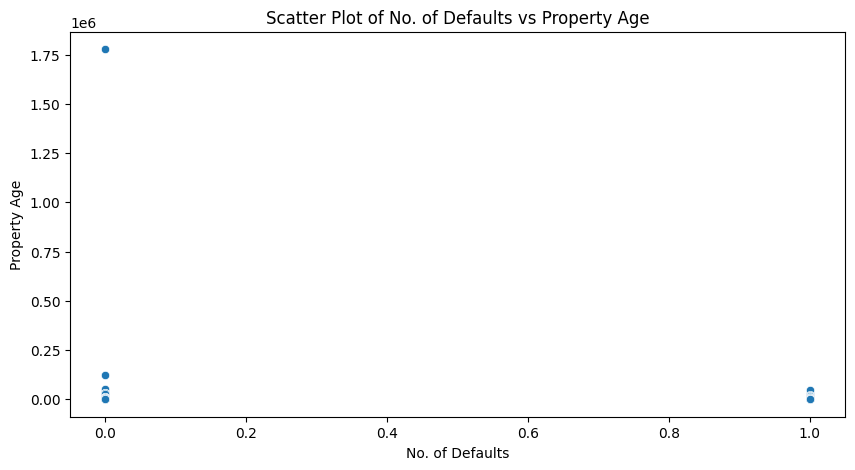

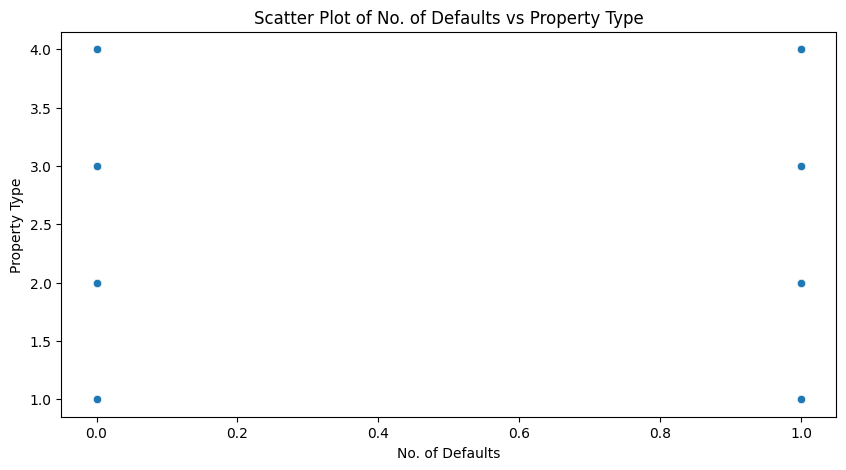

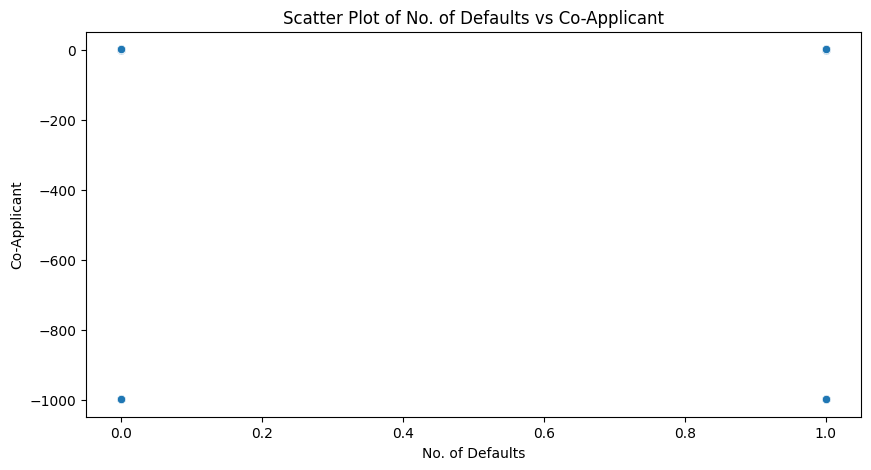

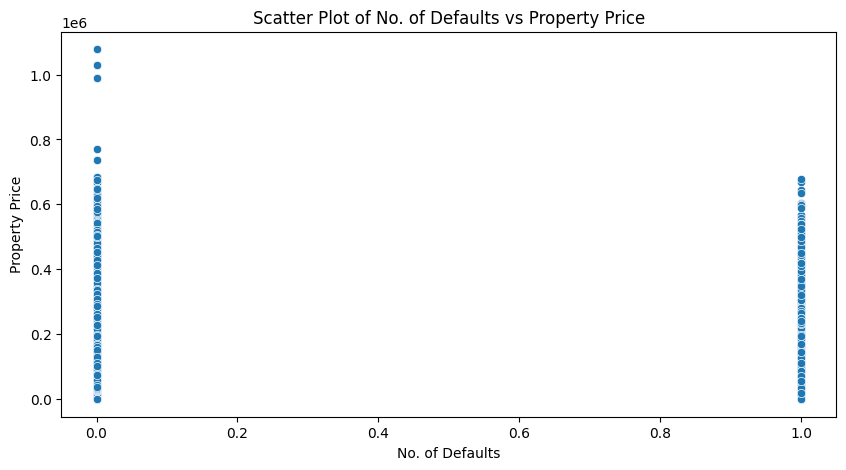

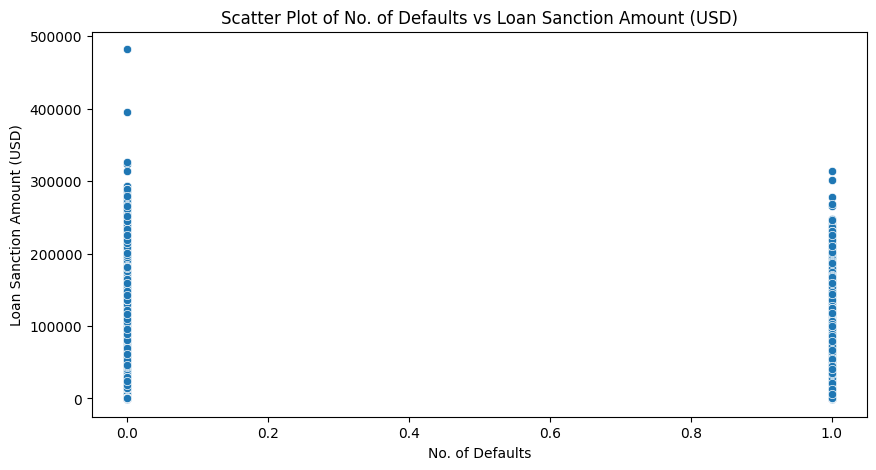

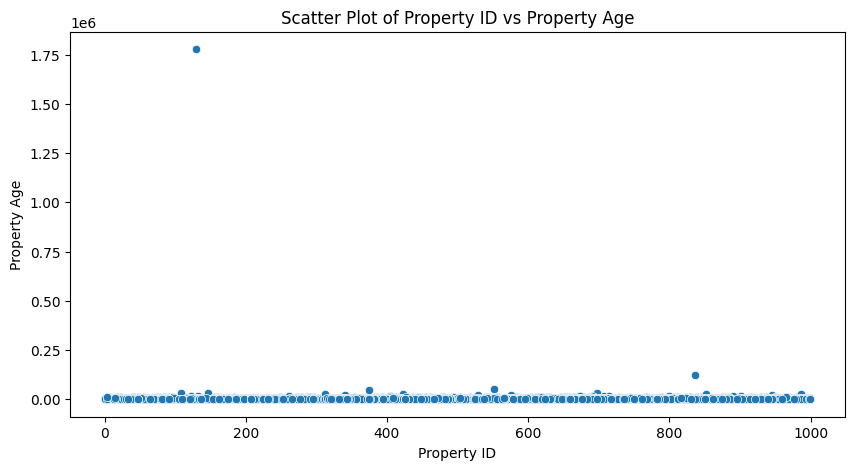

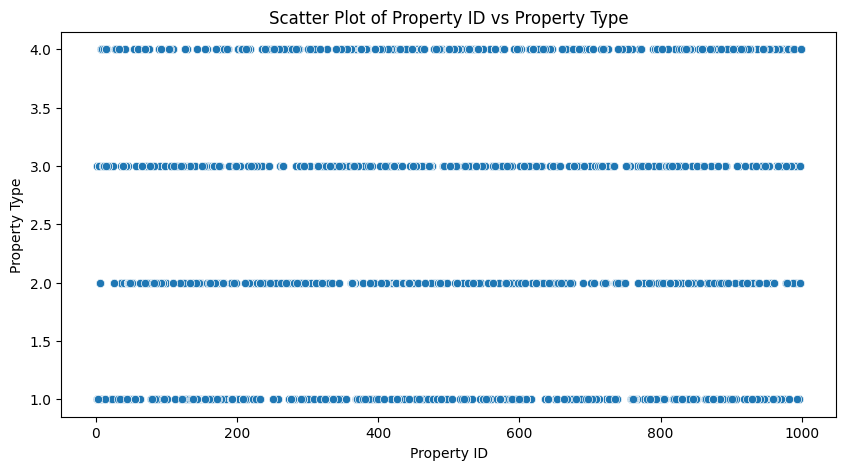

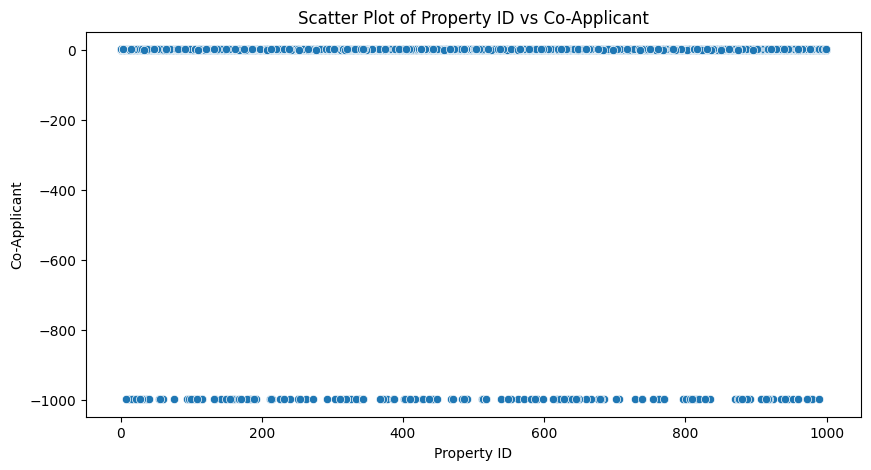

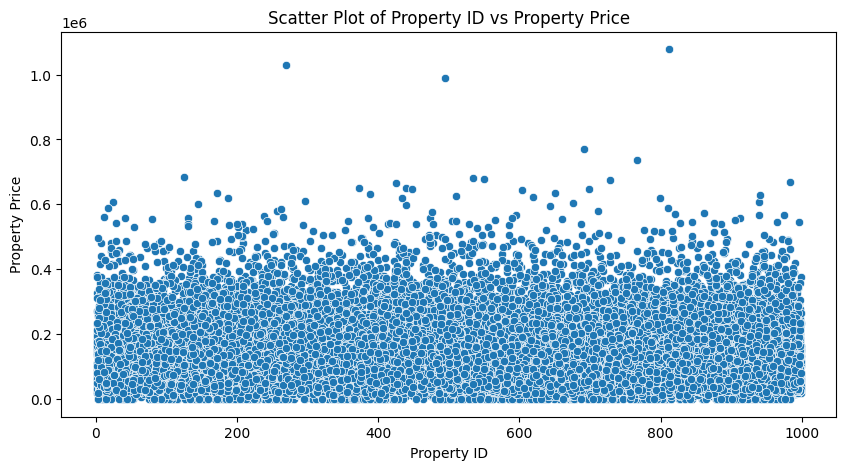

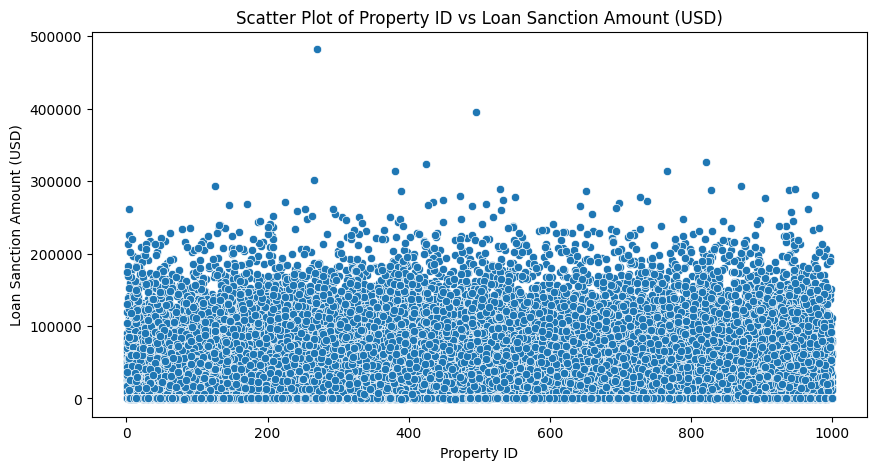

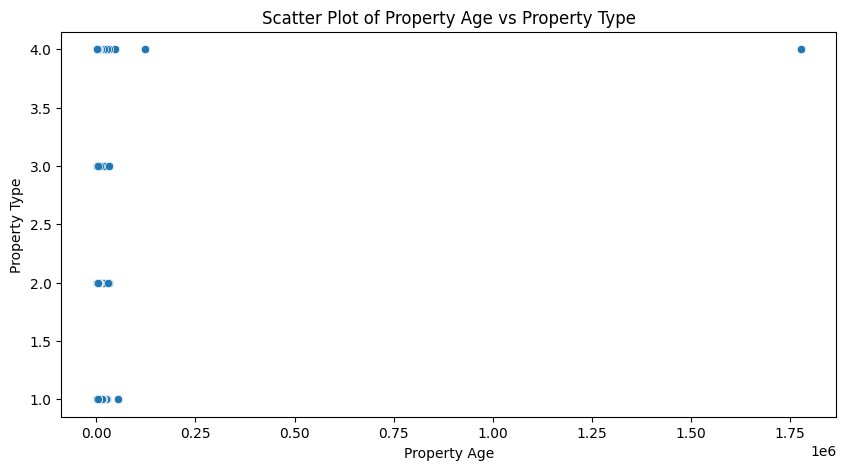

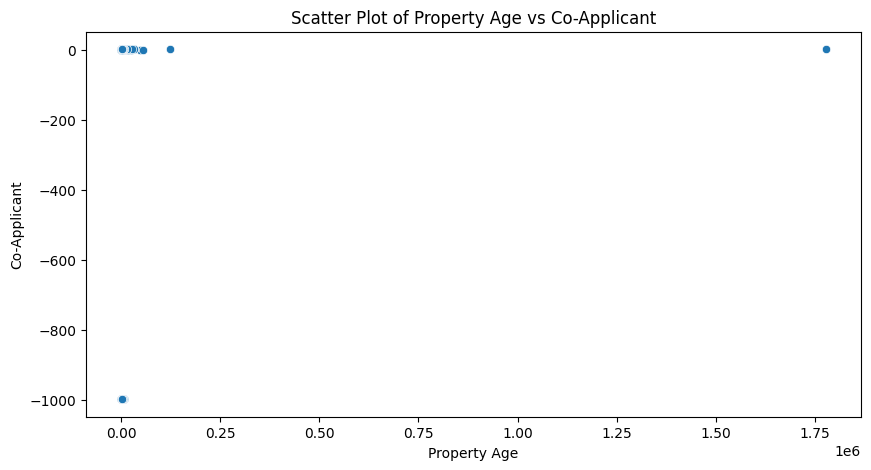

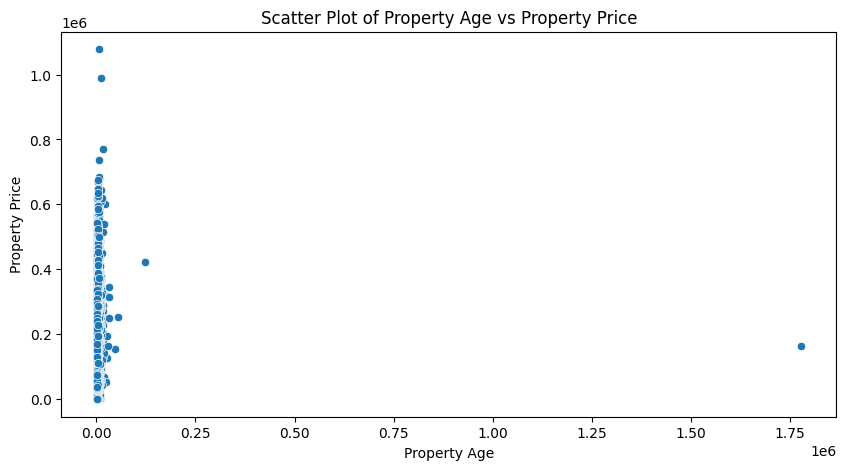

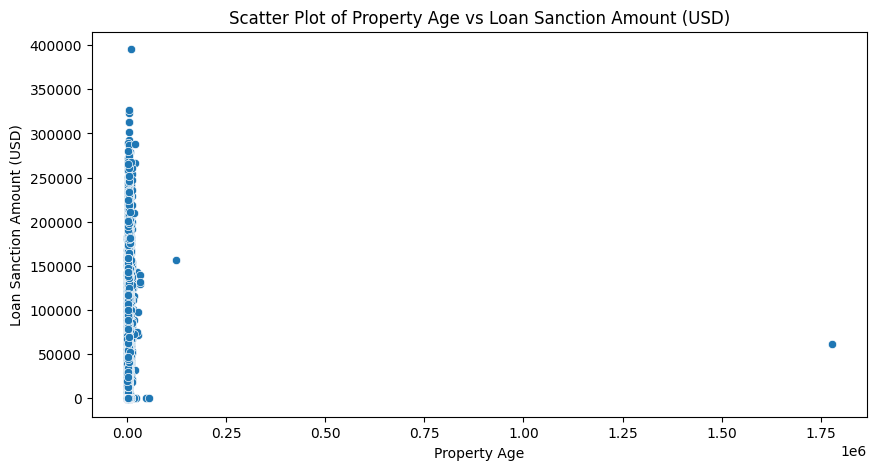

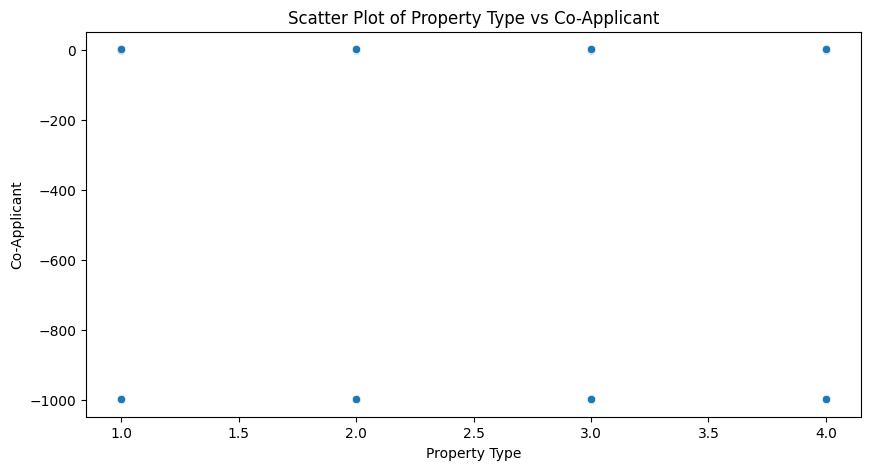

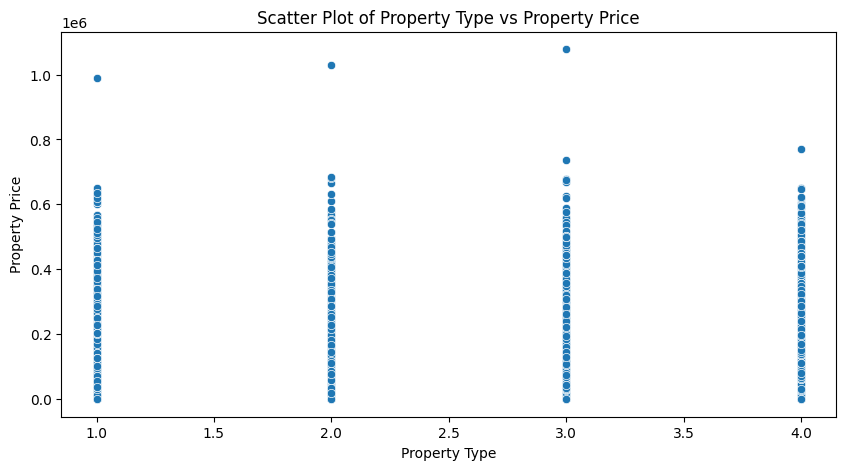

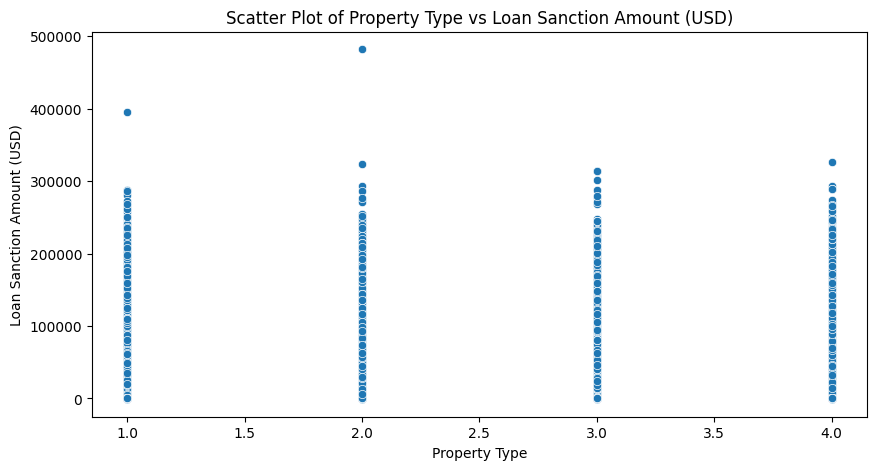

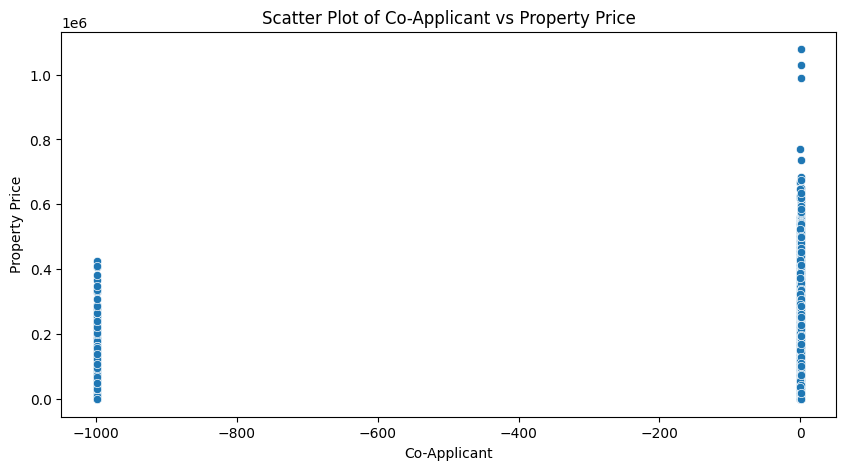

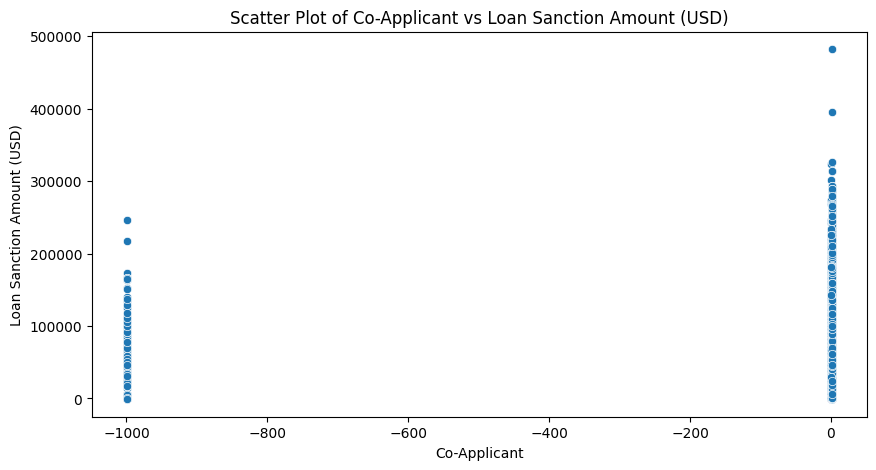

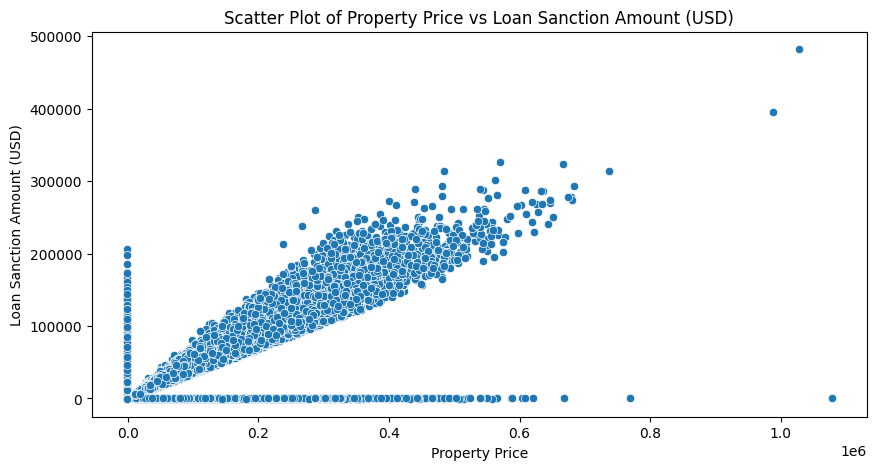

In [32]:
# Create scatter plots for pairs of numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=data[numerical_cols[i]], y=data[numerical_cols[j]])
        plt.title(f'Scatter Plot of {numerical_cols[i]} vs {numerical_cols[j]}')
        plt.xlabel(numerical_cols[i])
        plt.ylabel(numerical_cols[j])
        plt.show()


### Now Lets Handle The Outliers Using the Following Methods

1. Using Z Score

In [20]:
# Function to detect and remove outliers using Z-score
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=['float64', 'int64'])))
    filtered_entries = (z_scores < threshold).all(axis=1)
    return df[filtered_entries]

# Apply the function
data_cleaned_zscore = remove_outliers_zscore(data)

print(data_cleaned_zscore)
# Save the cleaned data to a new CSV file
data_cleaned_zscore.to_csv('Loan_Cleaned_ZScore.csv', index=False)


      Customer ID               Name Gender  Age  Income (USD)  \
0         C-36995   Frederica Shealy      F   56   1933.050000   
1         C-33999  America Calderone      M   32   4952.910000   
2          C-3770      Rosetta Verne      F   65    988.190000   
3         C-26480         Zoe Chitty      F   65   2630.574417   
4         C-23459       Afton Venema      F   31   2614.770000   
...           ...                ...    ...  ...           ...   
29995     C-43723  Angelyn Clevenger      M   38   4969.410000   
29996     C-32511       Silas Slaugh      M   20   1606.880000   
29997      C-5192       Carmelo Lone      F   49   2630.574417   
29998     C-12172      Carolann Osby      M   38   2417.710000   
29999     C-33003  Bridget Garibaldi      F   63   3068.240000   

      Income Stability            Profession     Type of Employment  \
0                  Low               Working            Sales staff   
1                  Low               Working               Labore

2. Using IQR

In [21]:
# Function to detect and remove outliers using IQR
def remove_outliers_iqr(df, factor=1.5):
    filtered_df = df.copy()
    for col in df.select_dtypes(include=['float64', 'int64']):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        filtered_df = filtered_df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return filtered_df

# Apply the function
data_cleaned_iqr = remove_outliers_iqr(data)
print(data_cleaned_iqr)
# Save the cleaned data to a new CSV file
data_cleaned_iqr.to_csv('Loan_Cleaned_IQR.csv', index=False)


C:\Users\mehta\AppData\Local\Temp\ipykernel_2656\1790917387.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
C:\Users\mehta\AppData\Local\Temp\ipykernel_2656\1790917387.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
C:\Users\mehta\AppData\Local\Temp\ipykernel_2656\1790917387.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
C:\Users\mehta\AppData\Local\Temp\ipykernel_2656\1790917387.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
C:\Users\mehta\AppData\Local\Temp\ipykernel_2656\1790917387.py:10: UserWarning: Boolean Series key will 

      Customer ID               Name Gender  Age  Income (USD)  \
0         C-36995   Frederica Shealy      F   56   1933.050000   
6         C-23855   Nathalie Olivier      M   43   2361.560000   
9         C-24944     Barbie Goetsch      M   18   1546.170000   
10        C-40801       Laree Staton      M   18   2416.860000   
12        C-30073         Brinda Vaz      F   48    777.250000   
...           ...                ...    ...  ...           ...   
29992     C-32912          Nana Nell      M   34   2904.150000   
29994      C-7813   Jocelyn Deschamp      M   39   2250.190000   
29996     C-32511       Silas Slaugh      M   20   1606.880000   
29997      C-5192       Carmelo Lone      F   49   2630.574417   
29999     C-33003  Bridget Garibaldi      F   63   3068.240000   

      Income Stability            Profession Type of Employment    Location  \
0                  Low               Working        Sales staff  Semi-Urban   
6                  Low               Working     

3. Using Winsorization

In [23]:
# Function to apply Winsorization
def winsorize_series(series, lower_percentile=0.05, upper_percentile=0.95):
    lower_limit = series.quantile(lower_percentile)
    upper_limit = series.quantile(upper_percentile)
    return series.clip(lower=lower_limit, upper=upper_limit)

# Apply Winsorization to numerical columns
for col in data.select_dtypes(include=['float64', 'int64']):
    data[col] = winsorize_series(data[col])
    print(data)

# Save the cleaned data to a new CSV file
data.to_csv('Loan_Cleaned_Winsorized.csv', index=False)


      Customer ID               Name Gender  Age  Income (USD)  \
0         C-36995   Frederica Shealy      F   56   1933.050000   
1         C-33999  America Calderone      M   32   4867.821000   
2          C-3770      Rosetta Verne      F   64   1066.511500   
3         C-26480         Zoe Chitty      F   64   2630.574417   
4         C-23459       Afton Venema      F   31   2614.770000   
...           ...                ...    ...  ...           ...   
29995     C-43723  Angelyn Clevenger      M   38   4867.821000   
29996     C-32511       Silas Slaugh      M   20   1606.880000   
29997      C-5192       Carmelo Lone      F   49   2630.574417   
29998     C-12172      Carolann Osby      M   38   2417.710000   
29999     C-33003  Bridget Garibaldi      F   63   3068.240000   

      Income Stability            Profession     Type of Employment  \
0                  Low               Working            Sales staff   
1                  Low               Working               Labore

4. Replacing Outliers with median based on IQR Method

In [27]:
# Function to replace outliers with median based on IQR method
def impute_outliers_median(df, factor=1.5):
    imputed_df = df.copy()
    for col in df.select_dtypes(include=(['float64', 'int64'])):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        median = df[col].median()
        imputed_df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])
    return imputed_df

# Apply the function
data_cleaned_imputed = impute_outliers_median(data)
print(data_cleaned_imputed)
# Save the cleaned data to a new CSV file
data_cleaned_imputed.to_csv('Loan_Cleaned_Imputed.csv', index=False)


      Customer ID               Name Gender   Age  Income (USD)  \
0         C-36995   Frederica Shealy      F  56.0       1933.05   
1         C-33999  America Calderone      M  32.0       4952.91   
2          C-3770      Rosetta Verne      F  65.0        988.19   
3         C-26480         Zoe Chitty      F  65.0           NaN   
4         C-23459       Afton Venema      F  31.0       2614.77   
...           ...                ...    ...   ...           ...   
29995     C-43723  Angelyn Clevenger      M  38.0       4969.41   
29996     C-32511       Silas Slaugh      M  20.0       1606.88   
29997      C-5192       Carmelo Lone      F  49.0           NaN   
29998     C-12172      Carolann Osby      M  38.0       2417.71   
29999     C-33003  Bridget Garibaldi      F  63.0       3068.24   

      Income Stability            Profession     Type of Employment  \
0                  Low               Working            Sales staff   
1                  Low               Working         

5. Log Transformation

In [28]:
# Function to apply log transformation to handle outliers
def log_transform(df):
    transformed_df = df.copy()
    for col in df.select_dtypes(include=['float64', 'int64']):
        transformed_df[col] = np.log1p(df[col])  # log1p is log(1 + x) to handle zero values
    return transformed_df

# Apply the function
data_log_transformed = log_transform(data)
print(data_log_transformed)
# Save the transformed data to a new CSV file
data_log_transformed.to_csv('Loan_Log_Transformed.csv', index=False)


c:\Users\mehta\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


      Customer ID               Name Gender       Age  Income (USD)  \
0         C-36995   Frederica Shealy      F  4.043051      7.567372   
1         C-33999  America Calderone      M  3.496508      8.507932   
2          C-3770      Rosetta Verne      F  4.189655      6.896886   
3         C-26480         Zoe Chitty      F  4.189655           NaN   
4         C-23459       Afton Venema      F  3.465736      7.869314   
...           ...                ...    ...       ...           ...   
29995     C-43723  Angelyn Clevenger      M  3.663562      8.511258   
29996     C-32511       Silas Slaugh      M  3.044522      7.382672   
29997      C-5192       Carmelo Lone      F  3.912023           NaN   
29998     C-12172      Carolann Osby      M  3.663562      7.790990   
29999     C-33003  Bridget Garibaldi      F  4.158883      8.029185   

      Income Stability            Profession     Type of Employment  \
0                  Low               Working            Sales staff   
1    

6. Isolation Forest(Machine Learning Based)

In [8]:
from sklearn.ensemble import IsolationForest
file_path = 'Loan_Cleaned.csv'
data = pd.read_csv(file_path)
# Function to apply Isolation Forest to detect and remove outliers
def isolation_forest_outliers(df):
    iso = IsolationForest(contamination=0.1)  # Adjust contamination as needed
    yhat = iso.fit_predict(df.select_dtypes(include=['float64', 'int64']))
    mask = yhat != -1
    return df[mask]

# Apply the function
data_cleaned_isolation_forest = isolation_forest_outliers(data)
print(data)
# Save the cleaned data to a new CSV file
data_cleaned_isolation_forest.to_csv('Loan_Cleaned_IsolationForest.csv', index=False)


      Customer ID               Name Gender  Age  Income (USD)  \
0         C-36995   Frederica Shealy      F   56   1933.050000   
1         C-33999  America Calderone      M   32   4952.910000   
2          C-3770      Rosetta Verne      F   65    988.190000   
3         C-26480         Zoe Chitty      F   65   2630.574417   
4         C-23459       Afton Venema      F   31   2614.770000   
...           ...                ...    ...  ...           ...   
29995     C-43723  Angelyn Clevenger      M   38   4969.410000   
29996     C-32511       Silas Slaugh      M   20   1606.880000   
29997      C-5192       Carmelo Lone      F   49   2630.574417   
29998     C-12172      Carolann Osby      M   38   2417.710000   
29999     C-33003  Bridget Garibaldi      F   63   3068.240000   

      Income Stability            Profession     Type of Employment  \
0                  Low               Working            Sales staff   
1                  Low               Working               Labore

7. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [11]:
from sklearn.cluster import DBSCAN

# Load the dataset
file_path = 'Loan_Cleaned.csv'
data = pd.read_csv(file_path)

# Function to apply DBSCAN to detect and remove outliers
def dbscan_outliers(df):
    dbscan = DBSCAN(eps=3, min_samples=2)  # Adjust eps and min_samples as needed
    yhat = dbscan.fit_predict(df.select_dtypes(include=['float64', 'int64']))
    mask = yhat != -1
    return df[mask]

# Apply the function
data_cleaned_dbscan = dbscan_outliers(data)
print(data)
# Save the cleaned data to a new CSV file
data_cleaned_dbscan.to_csv('Loan_Cleaned_DBSCAN.csv', index=False)


      Customer ID               Name Gender  Age  Income (USD)  \
0         C-36995   Frederica Shealy      F   56   1933.050000   
1         C-33999  America Calderone      M   32   4952.910000   
2          C-3770      Rosetta Verne      F   65    988.190000   
3         C-26480         Zoe Chitty      F   65   2630.574417   
4         C-23459       Afton Venema      F   31   2614.770000   
...           ...                ...    ...  ...           ...   
29995     C-43723  Angelyn Clevenger      M   38   4969.410000   
29996     C-32511       Silas Slaugh      M   20   1606.880000   
29997      C-5192       Carmelo Lone      F   49   2630.574417   
29998     C-12172      Carolann Osby      M   38   2417.710000   
29999     C-33003  Bridget Garibaldi      F   63   3068.240000   

      Income Stability            Profession     Type of Employment  \
0                  Low               Working            Sales staff   
1                  Low               Working               Labore